In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read input
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Describe data
train.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
print('train 2 esimest rida ', train.head(2))
print('test 2 esimest rida ', test.head(2))


train 2 esimest rida     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  

[2 rows x 81 columns]
test 2 esimest rida       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0 

In [4]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [5]:
#check for dupes for Id
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
train.drop(['Id'],axis =1,inplace=True)


0


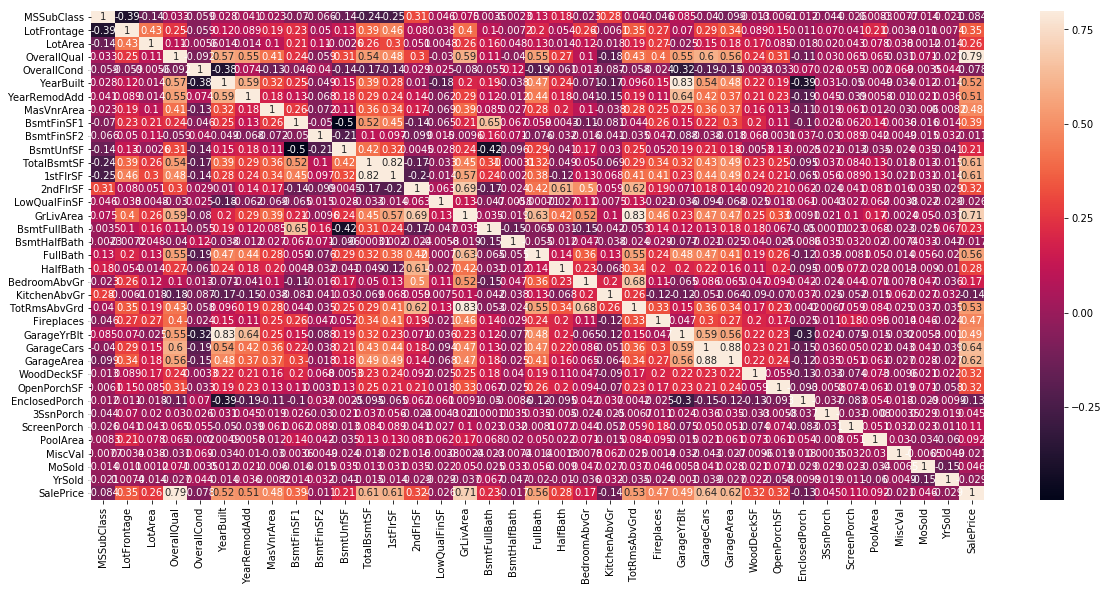

In [6]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);


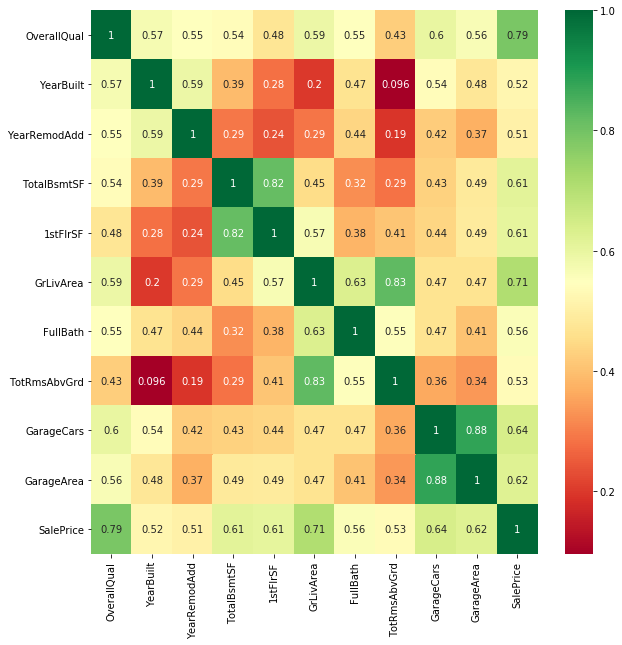

In [7]:
VALUE_TO_FILTER = 0.5

# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>VALUE_TO_FILTER]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [8]:
ImportantFeatures = ['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

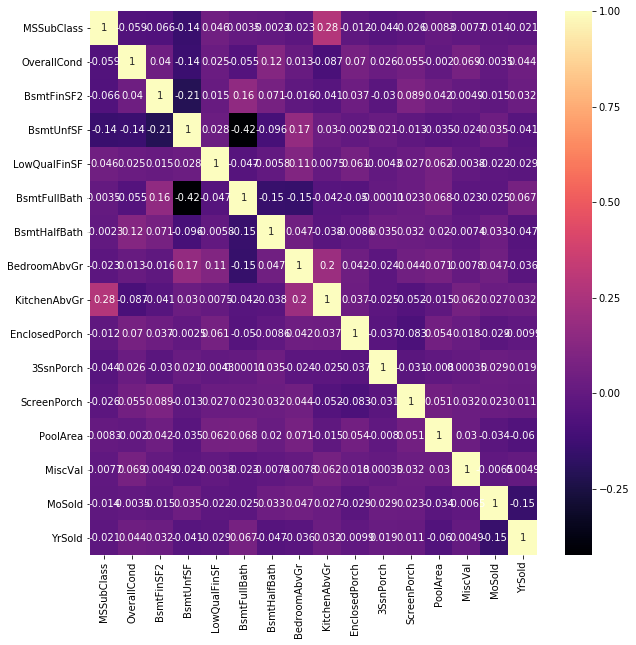

In [9]:
### Mida mitte kasutadadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAisAAAJDCAYAAADKCVQfAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvAOZPmwAAIABJREFUeJzs3Xl8VNX9//HXmcm+ExJCIOz7jogIgguiFRF3q3Vr1bpUW621tnX7YtVqW7f+tO6I+1IrqFXBlUVRFNkhIKsQCCELZCf7zPn9kZhkSEgGycxkyPv5eMyDufeeuXmfMMmcfO6ZM8Zai4iIiEh75Qh0ABEREZGWaLAiIiIi7ZoGKyIiItKuabAiIiIi7ZoGKyIiItKuabAiIiIi7ZoGKyIiItJmjDEvGGNyjTHpBzlujDGPG2O2GmPWGmPGtHZODVZERESkLb0ETG3h+OnAgLrbtcDTrZ1QgxURERFpM9baL4H8FpqcDbxia30LJBhjUls6pwYrIiIi4k/dgV2NtjPr9h1UiE/jAOb68R12Pf/8yvBARwiozV/kBDpCQB09Y2ygIwSUifL5r5d2rWptXqAjBMy63x0b6AgBNy5lhvHX1/L76+wzS6+j9vLNj56z1j53CGdo7nvTYh869m8TEREROSR1A5NDGZwcKBPo0Wg7Dchq6QG6DCQiIiL+9D7wy7p3BY0Hiqy1e1p6gCorIiIiQcw4/HbFySvGmDeBk4AkY0wmcDcQCmCtfQaYB0wDtgJlwJWtnVODFREREWkz1tqLWzlugd8eyjk1WBEREQli7a2y4guasyIiIiLtmiorIiIiQUyVFREREZEAU2VFREQkiKmyIiIiIhJgqqyIiIgEMWNUWREREREJKFVWREREgpjmrIiIiIgEmAYrIiIi0q7pMpCIiEgQ02UgERERkQBTZUVERCSIqbIiIiIiEmCqrIiIiAQxVVZEREREAkyVFRERkSCmyoqIiIhIgKmyIiIiEsRUWREREREJMFVWREREgpgqKyIiIiIBpsqKiIhIEDNGlRURERGRgFJlRUREJIhpzoqIiIhIgGmwIiIiIu2aLgOJiIgEsY5wGeiIHazMuvxOpo+YSG5JASPuuzTQcdpcyPBxRF1yIxgHlYvnUjnvDY/jYROnEnnh9bgL8gConP8uVYvnNjSIiCL+/leoWrmY8tcf82f0NhF/wiR6/d+dGKeD3Ldms+fZmc22S5x6GgOefIz0cy5g/7p0TEgIff7+N6KHDcU4nex9939kPfOcn9MfvsXbivjHZztxWcv5o5K55rhUj+Pvrt3LI/N30SU2FIBLxqZwwehkAB5ZsIsvtxYB8JtJqZw+tLN/w7exxZsL+Pu8HbjclguOTuGaE7s3afPRur08uSATY2Bw1ygeunBgAJK2DUf/owk941owDlwrPqVm8dsex51HnULoaVdhi/cBULP0A1wrPgXAxCcTes5NmPhksJaqV+/GFub6vQ+HY+3SLF59fDlut+WkM/pz5mXDPI6/9u8VfL8qB4CqihqKCyt4dt6FAPzn6VWs/nY3AOf8cjjjp/T2a3b56Y7YwcpL38zliUWzeeWKGYGO0vaMg6jLbqb0kT/izs8jdsazVK/+GndWhkezqu8WHHQgEnnur6nZtMYfaduew0Hvv85g46+uoio7h2Hvvk3h/AWUb93m2Sw6mpRfXUbpqtX1+xJPn4ojLJR1087CERHByE/msveDuVTt3u3vXvxkLrfl/k8ymHnxQFLiwrjoxQ1MHpBA/+RIj3ZThyZy12m9PPZ9sbWQ77PLmHP1MKpq3Fzx2kaO75dATLjTn11oMy635W8fbOf5K4fWfi+eWcfkIZ3o3yWqvs2OveXM/HI3r187nPjIEPaVVgcw8WEyDkLPvJ6ql+7CFu8l/Df/wrXxW2zeLo9mrnVfUj33mSYPDz3/Fmq+eAv3ttUQFgHW+it5m3C73Lz8r2X85dGTSUyOYsa1HzNmUhrde8fXt7nsxqPr7386ZxMZW/IBWP3NbnZsyef+WdOornbzwE2fMWp8dyKjQ/3ej7bWESorR+yclcVbV5O/vzjQMXzC2XcI7tzduPP2gKuG6qULCBs9yfvH9xqII64T1euX+TCl78SMGklFxk4qd2Viq6vJ/3AenU6Z0qRd2h9uYs9zs3BXVjXaa3FERoHTiSMiAnd1Na7SUv+FbwPrsvbTo1M4PTpFEOZ0MG1oIgu3FHj12G17yxnbM5YQhyEqzMmglCi+2lbk48S+sy6zlJ6dI+iRGEFYiIPTRySx4HvP78Xs5blccmxX4iNr/zbrHBO8L06OtIHYfVnYgmxw1eBa9yXOIeO9eqxJ7gEOZ+1ABaCqAqorfZi27W37fh8p3WPp0i2WkFAn46f0YsVXuw7a/pvPd9RXT3bvKGLwqC44QxxERIbQo18n1i7N8lNyOVxH7GDlSOZISMKd31C6dRfkYTolNWkXdvSJxN7zAtE33IPpVHsJAGOIvOgGyv77tL/itrmwlBSq9uyp367KziY0JcWjTdTQIYSnplK4cJHH/vyPPsFdXsaYbxYzevEC9jz/Aq6i4HqxzimpIjUurH47JTaMnJKm1YLPNhZw7sx0bp6zlT3FtS9Kg7pEsfiHIsqrXRSUVfNdRgnZJVVNHhsscoqr6BofXr/dNS6M3GLPF+Ad+8rZsbeCS59L5xfPrGPxZu8Gdu1SXGds0d76TVu0FxPb9DKec9hEwn/7BGG/uB0TV/u7wSR1h4r9hF18J+E3PE7IaVeBCa6XgIK95SQ2qpolJkdRkFfebNu92aXk7Sll2Jja3w096wYnlRU1lBRW8P2qHPbllvklt68Zh/HrLRBavAxkjCkBmqsTGsBaa+N8kkpa1txqhQf8L1WvXkLV0vlQU03YSWcRffUdlD70B8Inn0P12qXYurksQanZn5VG3wBj6HXn7Wz78+1NWkWPGoF1uVl13Ak44+MY+p/XKf56CZW7Mn0W1x8O/JZM7p/AGUMTCQtx8NbKXO74YDsvXjqYiX3jSd+zn0tf/p7EqFBGdY/GGcQV5GYvYhzw8+FyWzL2lfPSr4eSU1TF5c+v5383jiIuMhivgrf+n+XauBTX2kXgqsF5zOmEnn8LVS/eAQ4njl7DqHzqJmxRLmEX3obzqFNwrfzU97HbiG3mstXBFm/9dn4G407qicNZOyAbMS6VHzbu494bPiU2IZz+w5JwBvOTv4Np8afVWhv7U05qjLkWuBaAE/rA0C4/5TRyEO6CPByJDd9TR6dkbOFejza20SWwqi8+JOqC6wBw9htG6MCRhJ98NiY8EhMSCpXllM8OnkmmVdk5hKU2TCgN69qV6pyGSpMzOprIgQMY+sYrAIQmJzHw2afYfN0NJJ05naIvF2NraqjZl0/JipVEjxgeVIOVlNgw9hQ3VENySqrqJ9L+KCGq4Uf7gtHJPLqwoX/XTezGdRO7AfCn97bRKzHCx4l9p2tcGNlFDZWU7OIqusSGebRJiQtnVI8YQp0O0hIj6J0UQca+Ckakxfg77uEr3ouJb6iimvgkbMk+zzblJfV3Xcs/IfRnVwK1VRj3nm21l5AA1/ff4OgxGNdK38duK4nJUeQ3qobk55WRkBTZbNtvF2Twy5uP8dh39i+Hc/YvhwPw1L1fkZL2k17i2h3NWTmAMaaLMabnj7eDtbPWPmetHWutHauBSttzbd+IIyUNR1JXcIYQeuzJVK3+2qONiU+svx961ERce2on35bN/BtFf7qQ4j//gvL/Pk3lkk+CaqACULp2HRG9exGe1h0TGkri9GkUzF9Qf9xVWsrKYyaw+sQprD5xCqWr1rD5uhvYvy6dyqw9xE2ovcbviIwkdvQoyrf9EKiu/CTDu0Wzs6CSzMJKqlxu5m3IZ/KATh5t8kobBjMLtxTSt3PtgMTlthSW1QCwKbeMzbnlHNc3nmA1vHsMGfsqyMyvoKrGzUfr9jJ5sOf3YsqQTnz3Q+3gvWB/NRl7K+iRGN7c6do99+7NmM7dMQkp4AzBOeIEXBuXejaKaei/Y/Cx9ZNv7e4tmMgYiKotiDv6jsKdu9Nv2dtC38Gdyc4sITerlJpqF9/Oz2DMxLQm7fbsLGZ/SRUDhjcM7NwuNyV1A9ud2wrYua2QEcekNnmstE9e1UGNMWcBjwDdgFygF/A9MKylxwXSG1fdy0kDx5AUk8CuB97n7g9n8sKSDwIdq224XZS99v+IueVhcDio+moe7qwdRJxzFa4dG6levYTwU84nbPRErNuFLS1h/6x/BDp123G52HHPfQx6aRbG4SBv9hzKt2yl+803sn9dOoXzFx70oTmvvUHffz7AiI8+wBhD3px3KN+02Y/hD1+Iw3Dnz3py7X824XbDuaOS6J8cyb+/2M2w1ChOHtiJ15blsHBLIU6HIT4ihPun9wGgxm25/NXvAYgJd/KPs/sSEsR/lYU4DXdO78M1L3+P22059+guDEiJ4t+f72RY9xhOHpLIpAEJLNlaxPTHVuN0wK1Te5EQFaSTbN1uqj98mrBf3QcOB66Vn2FzdxJy8mW4s7bg3riUkAln4Rx8LLhd2LJSqt75V+1jrZvqj2cRfuUDYAzu3VtxrfgksP05RM4QB7+8eSwP3boAt9tywrR+pPVJYM6sNfQZ1Jkxk2oHLt98voPxJ/fy+IC/mhrL335Xe8krMjqU6+86DmdIcM3ZOZiOUFkxzV0DbNLImDXAycDn1tqjjDGTgYuttde2+tjrxwfXe+PaUH5lcP711lY2f5ET6AgBdfSMsYGOEFAmKhjnhLSdqrVBPC/sMK373bGBjhBw41Jm+G0EkfTIGX59nd37x7l+Hx15+9uk2lq7zxjjMMY4rLULjTH/9GkyERERaVVHqKx4O1gpNMbEAF8CrxtjcoEa38USERERqeXtYOVsoAL4A3ApEA/c66tQIiIi4h1VVupYa/c32nzZR1lEREREmvD23UCNF4cLA0KB/VoUTkREJLDMwVbGO4J4W1nxWDnHGHMOMM4niUREREQa+UlvMrfWvkftW5lFREREfMrby0DnNdp0AGM5yMdyiIiIiP9ogm2DMxvdrwF2UPsOIRERERGf8nbOypW+DiIiIiKHriNUVlqds2KMOdsY87UxJr/u9qkxZlLdseD9BDQREREJCi1WVowxNwBXAX8GltftHgs8aIx5DLgDGOXThCIiInJQHaGy0tploBuBidba/Eb7FhhjzgQygVt8lkxEREQEL+asHDBQ+XHfPmNMhrX2ad/EEhEREW84ftIiJMGltS4WG2OaXOap21fkm0giIiIiDVqrrPwReN8Y8yKwgtq1VY4BfgVc5uNsIiIi0gpnB1huv8XKirX2K+DYunZXUDvZ1gGMrzsmIiIi4lPezFnJBmb4IYuIiIgcImdHfzeQMWYdzS+rbwBrrR3pk1QiIiIidVqrrEz3SwoRERH5STrCnJUWByvW2gx/BRERERFpTmuXgUpo+TJQnE9SiYiIiFecHWCdldYqK7H+CiIiIiLSHK8+dflHxpguQMSP29banW2eSERERKQRrwYrxpizgEeAbkAu0Av4Hhjmu2giIiLSmo4wwdbbK133AeOBzdbaPsAU4GufpRIRERGp4+1loOq6Dy90GGMc1tqFxph/+jSZiIiItKojVFa8HawUGmNigC+B140xuUCN72KJiIiI1PJ2sHI2UA78AbgUiAfu9VUoERER8U6HX24fwBjjBP5nrT0FcAMv+zyViIiISB1vPsjQZYwpM8bEW2uL/BFKREREvOM88gsrXl8GqgDWGWM+A/b/uNNae5NPUomIiIjU8XawMrfuJiIiIu2I5qzUsda+bIyJBHpaazf5OJOIiIhIPW9XsD0TeBgIA/oYY0YD91prz2rtsfmV4YeXMIglhlcGOkJAvfvZ6YGOEFCfj50X6AgBlV8Q6ASBNWLYkf/X7sGMndgz0BECb6r/vlRHWGfF2xVs/wqMAwoBrLWrgT4+yiQiIiJSz9s5KzXW2iLjOXqzPsgjIiIih0BzVhqkG2MuAZzGmAHATcAS38USERERqeXtZaAbqf2E5UrgDaAIuNlXoURERMQ7TuPfWyB4W1kZZK29E7jTl2FEREREDuRtZeVRY8xGY8x9xphhPk0kIiIi0oi366xMNsZ0BS4EnjPGxAFvWWv/5tN0IiIi0qKOMMHW28oK1tpsa+3jwG+A1cAMn6USERERqePtonBDgIuAC4B9wFvAH32YS0RERLzQERaF83aC7UvAh8D1wDJrbYXPEomIiIg00uJgxRgTAjwA9APOBc4D0owxLwJ3WmurfR9RREREDqYjVFZam7PyEJAI9LHWjrHWHkXtwCWB2s8KEhEREfGp1i4DTQcGWmvrl9a31hYbY64HNgK/92U4ERERaZnT67fKBK/WumgbD1Qa7XShzwYSERERP2htsLLBGPPLA3caYy6jtrIiIiIiAeQ0xq+31hhjphpjNhljthpjbmvmeC9jzHxjzFpjzCJjTFpr52ztMtBvgXeMMVcBK6itphwDRFI74VZEREQEAGOME3gSOBXIBJYZY9631m5o1Oxh4BVr7cvGmJOBvwOXt3TeFgcr1trdwLF1JxsGGOAja+38n94VERERaSvtbAXbccBWa+0PAMaY/wBnA40HK0OBP9TdXwi819pJvV1ufwGw4FDSioiISIfTHdjVaDsTOPaANmuA84HHqL1KE2uM6Wyt3Xewk3q7KJyIiIi0Q/5eZ8UYcy1wbaNdz1lrn/vxcDMPOfANObcCTxhjrgC+BHYDNS19TQ1WRERExGt1A5PnDnI4E+jRaDsNyDrg8VnULjKLMSYGON9aW9TS19RgRUREJIi1s3VWlgEDjDF9qK2Y/AK4pHEDY0wSkG+tdQO3Ay+0dtL21UUREREJWtbaGuB3wCfA98B/rbXrjTH3GmPOqmt2ErDJGLMZSAHub+28qqyIiIgEsfb22UDW2nnAvAP2zWh0fzYw+1DOqcqKiIiItGsarIiIiEi7pstAIiIiQaydLQrnE6qsiIiISLumyoqIiEgQa28TbH1BlRURERFp11RZERERCWLtbFE4n+gAXRQREZFgpsqKiIhIENOcFREREZEAU2VFREQkiDmP/MJKcA9WQoaPI+qSG8E4qFw8l8p5b3gcD5s4lcgLr8ddkAdA5fx3qVo8t6FBRBTx979C1crFlL/+mD+j+9ysy+9k+oiJ5JYUMOK+SwMdp81tWp7H+89swLotx0ztweQL+3kcL8gt57+PrKGitAa323L6lYMYPK4Lm1fm8fGLm3DVuHGGOJj268H0H50UoF78dElTjmfIA3eC00Hmq2+z/bGZzbZLOes0jnrpcZacfD7Fq9OJ7NGdSd/OY//W7QAULl/Dhj/e7c/obSL1tOM5+rE7MU4H255/mw3/bL7/Pc4/jeNnP87HY88nf0U6nY8Zwbjn7qs9aAzr/vpvMt/73I/J20bMxEl0u632/79gzmzyZjXf/7hTT6PXvx5j60UXUL4+HRMSSre77yFq2HCsdbPnHw+wf9l3fk5/eBZ/v48H3tmC2225YHwq15zau0mbj1bl8ORH28EYBneL4eFfDQPgmqdXsyajmDF94nnmulF+Ti6HI3gHK8ZB1GU3U/rIH3Hn5xE741mqV3+NOyvDo1nVdwsOOhCJPPfX1Gxa44+0fvfSN3N5YtFsXrliRuuNg4zbZXnvyfVc/cA44pMieOL3XzP02C6k9Iqtb7Pgza2MPD6VCdN7kZNRwoszlnPbuC5Ex4VxxV/HEtc5guwdJcy66zvufG1KAHvzEzgcDH1wBsvOu5KKrBwmzJ9N7scL2L9pm0czZ0w0va69nMLlqz32l+3YyZITz/Fn4jZlHA7GPjmDBadeSXlmDqctm03m+wso/t6z/yEx0Qy66XL2ftvQ/8L0LXw89nysy0VE12Smrfkfuz9YiHW5/N2Nn87hoNtdM9h+zVXUZOfQ7623KV64gMofPPvviIom6dLLKFvT0P9OF/wcgC3nnYUzMZE+T89k6y8uAGv92oWfyuW23Pf2JmbdcBQpCeFc+MhyJo9Ipn/X6Po2O3LLmPlZBq/ffDTxUaHsK6mqP3bVyT2pqHbz1te7AxHfZxwdec6KMeajRvf/7J843nP2HYI7dzfuvD3gqqF66QLCRk/y/vG9BuKI60T1+mU+TBk4i7euJn9/caBj+MSuzYV07hZF59QoQkIdjDoxlQ3f5ng2MlBZVgNARVkNsZ3DAejeP564zhEApPSKoabKTU1VEL1QAQlHj6RsewblGZnY6mqy35lLyulNB1wD7vg92x9/HndFZQBS+k7ncSMp3ZrB/u2ZuKuryfjPXNLObtr/kff9ng0PPo+rUf9d5RX1AxNnRDg2SF6kG4saMZKqnTupzszE1lRT9NE84k5u2v+UG28i78VZuKsaXqwj+vVj/9JvAHDl5+MqKSZy2HC/ZT9cazOK6ZkcRY+kSMJCHEwb04UF6/I82rz9TRYXH59GfFQoAJ1jw+qPTRiUSHS406+ZpW20NMG2a6P7v/B1kEPlSEjCnZ9bv+0uyMN0alrODzv6RGLveYHoG+7BdEqu3WkMkRfdQNl/n/ZXXGlDRXsrSEiOqN+OT4qkaJ/nC/Kplw1g1cLd3H/ZAl6csYyzrx/W5DzrvsqmW784QsKC65dXeGoK5buz67crsnIIT03xaBM7YggR3buS9+miJo+P7JnGcYveZdwHr9Jp/NG+jtvmIrunsH9XQ//LMnOI6u7Z/06jhxDVoytZcxc1eXzncSOZlv4h09a9z7Lf3B1cVRUgpEsK1dl76rerc7IJ7eLZ/4jBQwjtmkrJF4s89pdv2kTc5CngdBLavTuRQ4cR2jXVH7HbRG5RJV0Twuu3UxLCySny/NnPyCtjR24Zl/y/FVz06HIWf7/P3zH9zmn8ewuEli4Dte8/OZorex2QuHr1EqqWzoeaasJOOovoq++g9KE/ED75HKrXLsUW5DU9hwSlA58NqxdlcfQpaZxwfl8yvi/grYfW8IdnjsdR94Ff2RklfPTCJq6+/xj/hz1czT73rcfxIfffzrrf3t6kWUVOLl+MnEx1QSFxo4Zx1GtP8tVxZ+Aq2e/DwG2smf7bA/o/5l+38+0VTfsPsO+7tcwbPp24wX2Z8PI/yfroS9yVVc22bZea/e/37H/qX24n886m/S94dw4RffvS/63ZVGdlUbZ6FdZV48Owbau5Qpg54BtS47Jk5JXx8o1HkVNYyWWPreT928YRV1dpkeDU0mClrzHmHWp/NH68X89ae97BHmiMuRa4FuDR4wZwxaC2H7m7C/JwJHap33Z0SsYW7vVoYxtdBqn64kOiLrgOAGe/YYQOHEn4yWdjwiMxIaFQWU757OfaPKe0vfikCArzKuq3i/aWE9c53KPNsk8y+fXfagcivYZ0oqbaRVlxFTEJ4RTmlfPqfSu46NaRdO4WTbCpzMomsntD4TOiWwqV2Q1VxpCYaGKGDGTcB68AENYlmTGvP83KS6+neHU61VWFABSvWU/59p1E9+tD8ep0/3biMJRnZhPdo6H/UWkplGc19D80Npr44QOZsqi2/5Fdkznh/af58qzryV/R0M/ijT9Qs7+chOEDPfa3dzU5OR7VkNCUrtTkNfTfER1NRP8B9H2xtv8hSUn0+vdTZNx4A+Xr09nz4D/q2/Z97U2qMjzn+bVnKQnhZBc2VFJyCivpEh/m0aZrQjijescT6nSQ1jmSPl2iyMgrZ0SvI3ew0gE+dLnFwcr5je4/cSgntdY+BzwHUHDViT6p0Li2b8SRkoYjqSvugr2EHnsy+5+9z6ONiU/EFuUDEHrURFx7an8oy2b+rb5N2MSpOHsP0kAliKQNjGdf1n7ys8uI6xzBmi/28Iu/jPZok9Alkq2r9zH21DRydpZSXeUmOj6M8tJqXrp7OVOvGETvYYkB6sHhKVq5jqi+vYnsmUbFnhy6nncGa6/9Y/3xmpJSFgwYX7897v1X2DjjQYpXpxPauRPVBUXgdhPZK42ovr0p37ErEN34yfYtW0fsgN5E906jfHcOvX5xBksuaeh/dXEp7yQ39H/KwldYdeuD5K9IJ7p3GmW79mBdLqJ6diN2UB/27wiuyZZl6esI79mL0O7dqcnJJf70aez68631x92lpXx//IT67T4vvkL2ww/WvhsoIgKMwZaXEzPhOKipaTIxtz0b0TOWjLwyMveV0yU+nHkrc3nol0M92kwZmczcFTmce2wqBaVV7MgrIy0pMkCJpa0cdLBirZ3feNsYEwIMAbKstYG/COh2Ufba/yPmlofB4aDqq3m4s3YQcc5VuHZspHr1EsJPOZ+w0ROxbhe2tIT9s/7R+nmPEG9cdS8nDRxDUkwCux54n7s/nMkLSz4IdKw24XQ6OPv6Ycy66zvcLjjmZ2l07RXLp69sJm1gPEPHpzD96sHMeTydr97dDgYuvGUkxhiWfJDB3qwy5r+5lflvbgXg6vvHEZMQ3spXbT+sy8WGP9/L2NnPY5xOMl+fQ+nGrfS//SaKVqWT9/GCgz428bhj6H/7TdgaF9blYv0f76a6sMiP6Q+fdblY/rt7mfxJbf9/eGEORRu2MuKem8hfns7uDw7e/+RJRzP0tmuw1TVYt5vlN/yVyn0FfkzfBlwush64jz7Pzqp96/K7c6jctpUuv72R8vXplCxaeNCHhiR2ps+zz2Otm5qcHHbd/hc/Bj98IU4Hd50/kKufXo3bbTlvfDcGpMbw+LwfGN4jlpNHJDNpcCJfb8xn+gPf4nAYbj27P52ia6sqlz22gh9yyiircnHSjK/528WDmTSkc4B7Jd4wB5sNb4x5EnjKWrveGBMHLAGcQALwe2vtf735Ar6qrASDxPAj610Yh+rdP01ovdERLGLsvEBHCKj8IBsDtLURwzpAbf4ghj08OdARAs4x9Wm/PQFuXXyNX19nHz5+pt+f3C29G+gka+36uvtXAj9Ya4cARwO3+TyZiIiICC3PWWk8Pf5UYDaAtTbLmA6wAo2IiEgQcHSAGbYtVVaKjDFTjTEjgUnAJwDGGCeg2UoiIiLiFy1VVn5D7buAugJ/tNb+uArRKcDHvg4mIiIirevQH2Rord0InGKMmWCt/abR/k+MMcH19gERERGoLd+9AAAgAElEQVQJWi1dBvrRk17uExERET9zGP/eAuGglRVjzDhgApBsjLmp0aE44MhdClBERETalZbmrEQDSXVtkhvtLwF+7stQIiIi4p2OPmdlIbDQGPOitfYHP2YSERERqddSZeVHCcaY/wK9G7e31o7xVSgRERHxjqMDLH3mzWDlDeAOYB3g9m0cEREREU/eDFb2WWvf8XkSEREROWQdes5KI/cYY54FPgfqP5nPWvu+z1KJiIiI1PFmsHIpMBKIoeEykAU0WBEREQmwDvDRQF4NVo621g73eRIRERGRZnizgu1SY8wgnycRERERaYY3lZVxwFpjzFZq56wYwOqtyyIiIoHn1FuXATjH5ylEREREDsKbwYoLyLLWVhljJlE72fY138YSERERb3SECbbezFl5D7DGmH7AK8AQaheKExEREfE5byorbmtttTHmPOD/WWsfN8as8nUwERERaV1HWBTOm8pKjTHm58DlwId1+0J9F0lERESkgTeVlauAG4AHrbU/GGP6AG/6NpaIiIh4w+FN2SHItTpYsdamUztY+XF7O3C/L0OJiIiI/Oig4zFjTD9jzExjzIPGmG7GmA+MMUXGmBXGGK2xIiIi0g44jfHrLRBaKh69BKwC8oGl1L4DqDtwF/CUz5OJiIiI0PJloFhr7VMAxphrrLU/zlP5yBjzd99HExERkdZ09HVW3I3uF7VwTERERMRnWqqsDDbGrKT2s4AG1d2nbnugz5OJiIhIqzrCOistDVZG+C2FiIiIyEEcdLBird3mzyAiIiJy6DrCnJWDDlaMMQWAbe4QYK21iT5LJSIiIlKnpctASX5LISIiInIQLV0GcjXeNsYkAhGNdmX5KpSIiIh4J1ALtflTq8vtG2POAP4FpAH7qF0YbjMw2JsvsPmLnMPJF9Te/ez0QEcIqHMf+ibQEQKq/OaO/aa59+/bHOgIAdURPq/loCqqAp1AjjDefJDh/cBE4FNr7VHGmFOB830bS0RERLzRESbYejP2r7HW5gEOY4yx1n4G6LOBRERExC+8qawUGWOiga+AV4wxuWgFWxERkXahIywK501l5RygArgZWATsBqb7MJOIiIhIPW8GK7dba13W2mpr7Sxr7aPALb4OJiIiIq1zGOPXW0D66EWbqc3sO6Otg4iIiIg0p6UVbK8DfgMMbPQhhgCxwHJfBxMREZHWdYQ5Ky1NsP0vMB/4O3Bbo/0l1tpcn6YSERERqdPSCrYFQAHwc2PMcGBS3aHFgAYrIiIi7UCg5pH4U6tzVowxv6W2ytKz7vZfY8wNvg4mIiIiAt6ts3IdMM5aWwpgjHkAWAI85ctgIiIi0jpVVmoZoLrRdnXdPhERERGfa+ndQCHW2hrgVeBbY8ycukPnAi/7I5yIiIi0rCNUVlq6DPQdMMZa+6AxZiFwPLUVld9Ya5f5JZ2IiIh0eC0NVuqHanWDEw1QRERExO9aGqwkG2MOuqx+3bL7IiIiEkAO48300+DW0mDFCcSgybQiIiISQC0NVvZYa+/1WxIRERE5ZB1hgm1LtaMjv/ciIiLS7rVUWZnitxQiIiLyk3Toyoq1Nt+fQURERESa481y+yIiItJOdejKioiIiEh7oMqKiIhIEHN0gLrDkd9DERERCWqqrIiIiAQxzVkRERERCTBVVkRERIKYKisiIiIiAabKioiISBDrCJ+6fOT3UERERIKaBisiIiLSrmmwIiIiEsQcxvj11hpjzFRjzCZjzFZjzG3NHO9pjFlojFlljFlrjJnW2jmDes5K/AmT6PV/d2KcDnLfms2eZ2c22y5x6mkMePIx0s+5gP3r0jEhIfT5+9+IHjYU43Sy993/kfXMc35Of3g2Lc/j/Wc2YN2WY6b2YPKF/TyOF+SW899H1lBRWoPbbTn9ykEMHteFzSvz+PjFTbhq3DhDHEz79WD6j04KUC98Z9bldzJ9xERySwoYcd+lgY7T5hz9xhBy2jXgcOBa9Rmur2d7HHeOmkLIKVdiS/YB4Fo2F9eqT3H0HkHIz66ub2eS0qie8xDuTd/6Nf/h6vqz4xn9aO3P/vYX3mbjQ83/7KeddxrHvfU4n40/n4IV6fX7o3qkctrauWy49wk2/esFf8VuMzETJ9H1L3eCw0HhO7PZ+0Lz/Y879TR6PPIY235xARUb0jEhoaTOuIfIYcPB7WbPPx+gbPl3fk5/eBZvKuCB93/AbS0XHJPCNZN7NGnz0Zo8nvx8J2AY3C2ahy8eBMA1s9JZs7OEMb3jeObKYX5O3jEYY5zAk8CpQCawzBjzvrV2Q6NmdwH/tdY+bYwZCswDerd03uAdrDgc9P7rDDb+6iqqsnMY9u7bFM5fQPnWbZ7NoqNJ+dVllK5aXb8v8fSpOMJCWTftLBwREYz8ZC57P5hL1e7d/u7FT+J2Wd57cj1XPzCO+KQInvj91ww9tgspvWLr2yx4cysjj09lwvRe5GSU8OKM5dw2rgvRcWFc8dexxHWOIHtHCbPu+o47X5sSwN74xkvfzOWJRbN55YoZgY7S9oyDkNN/Q/Vr/4ct3kfY1Y/i3rQUu3eXRzPX+sXUfPysxz73jnVUPff72o2IGMJvfA73tlX+St4mjMPBmMdn8MXpV1KemcMp384m68MFFH/v+bMfEhPNgN9dzr6lq5ucY/TDt5P98WJ/RW5bDgepd8xgx7VXUZOTQ98336Zk0QIqfzjgd19UNImXXEbZ2ob+dzr/5wBsO/8snImJ9HpqJj9cfAFY69cu/FQut+W+97Yx6+rhpMSHceETq5k8tDP9U6Lq2+zYW87MRZm8fv0o4qNC2FdaVX/sqhPTqKhy8dbS7EDE95l29tblccBWa+0PAMaY/wBnA40HKxaIq7sfD2S1dtKgvQwUM2okFRk7qdyVia2uJv/DeXQ6pemLbtofbmLPc7NwV1Y12mtxREaB04kjIgJ3dTWu0lL/hT9MuzYX0rlbFJ1TowgJdTDqxFQ2fJvj2chAZVkNABVlNcR2Dgege/944jpHAJDSK4aaKjc1VS6/5veHxVtXk7+/ONAxfMJ0H4At2IMtzAF3Da71X+IYdOwhn8c5dCLurSugptIHKX0ncdxISrdlsH97Ju7qana+NZduZzb92R9+z+/Z+PDzuCo8+9ftrCmUbs+keMMWf0VuU5HDR1K1cyfVuzOxNdUUfTyP2MlN+9/ldzex98VZ2Ea/+8L79WP/0m8AcOXn4yoprq2yBIm1u0ro2TmCHp0jCAtxMG1UMgs27PNo8/Z32Vw8IZX4qNq/xTvHhNUfm9A/gehwp18zd0DdgcZ/OWXW7Wvsr8BlxphMaqsqN7Z20qAdrISlpFC1Z0/9dlV2NqEpKR5tooYOITw1lcKFizz253/0Ce7yMsZ8s5jRixew5/kXcBUV+SN2myjaW0FCckT9dnxSJEX7PH8hn3rZAFYt3M39ly3gxRnLOPv6piXPdV9l061fHCFh+uENJia2M7Zob/22Ld6Hie3cpJ1zyHGEXfc4oRfcBnFNL/U5hh2PK/1Ln2b1hchuKZRlNvxlXL47h8junj/7CaOHEJXWlT3zFnnsd0ZFMvhP17Dhvif8EdUnQlNSqM5p+N1XnZNNSBfP/kcMHkJo11RKv1zksb9i06bagY3TSWj37kQOGUZI11R/xG4TuUVVdE0Ir99OiQ8np6jKo01GXjk79pZzyVNruOiJNSzeVODvmH7n7zkrxphrjTHLG92ubRSnuTLPgaW7i4GXrLVpwDTgVWNafv918F4Garbq1ej7YQy97rydbX++vUmr6FEjsC43q447AWd8HEP/8zrFXy+hclemz+L62oHfjtWLsjj6lDROOL8vGd8X8NZDa/jDM8fjcNS2zM4o4aMXNnH1/cf4P6wcptZ/F7g2f4cr/Qtw1eA8eiqhZ99M9at3NTSI6YSjS2+qt630bVRfaK7kbT1/9kc/fDvf/brpz/7wu29k82MvU7O/zIcBA+CA/nf90+3s/r+m/S94bw7hffvS983ZVO/JomzNKqip8WPQw9PcxaoDnw41bkvG3nJevm4EOUVVXPb0Wt6/ZQxxkcH7ctfeWGufAw420TMTaDyRKI2ml3l+DUytO9c3xpgIIAnIPdjXbPF/zxjzgLX2jrr7p1prP2uxBw2Puxa4FuC2pBTOiUvw5mGHpCo7h7DUhr8Iwrp2pTqnoZ/O6GgiBw5g6BuvABCanMTAZ59i83U3kHTmdIq+XIytqaFmXz4lK1YSPWJ40AxW4pMiKMyrqN8u2ltOXOdwjzbLPsnk13+rHYj0GtKJmmoXZcVVxCSEU5hXzqv3reCiW0fSuVu0X7PL4bMlezHxDZUSE9cZW5Lv2ai8pP6ua+WnhEy5wuOwc+gkXBu/AXfwXQIs351NVFrX+u3I7imUZzX87IfGRhM/bCCTP6/92Y/omsykd57mq/OuJ3HcKNLOO41Rf7+V0IQ4rNuNq7KSrU+97vd+/FTVOTmEpjT87gtN6UpNXkP/HdHRhPcfQO9Ztf0PSUqi5+NPsfOmG6jYkE72Q/+ob9vnlTep2pnhv/CHKSU+jOzChipyTlElXeLCPNp0jQ9nVM9YQp0O0hIj6JMcScbeckb0iD3wdEeMdrYo3DJggDGmD7Ab+AVwyQFtdgJTgJeMMUOACCCvpZO21sOpje7/09uk1trnrLVjrbVjfTFQAShdu46I3r0IT+uOCQ0lcfo0CuYvqD/uKi1l5TETWH3iFFafOIXSVWvYfN0N7F+XTmXWHuImjAfAERlJ7OhRlG/7wSc5fSFtYDz7svaTn11GTbWbNV/sYcj4A8rgXSLZurr2Wm7OzlKqq9xEx4dRXlrNS3cvZ+oVg+g9LDEQ8eUw2d1bMIndMAkp4AjBOewE3JsPeEdHTKf6u46B45pMvnUOPwH3+uC7BASQv2wdMf17E907DUdoKD0vOoOsDxt+9quLS/lf6njmDpjC3AFT2Ld0NV+ddz0FK9JZOPnS+v1bHn+Zjf94NqgGKgDl69cR1qsXod27Y0JCiZ86jZJFDf13l5ay6cQJbDl9CltOn0L52jX1AxUTEYGJjAQgevxxWFdNk4m57dmItFgy9pWTmV9BVY2beWvymDzE8/fYlGGdWbqt9rJ+wf5qduwtJy0xornTiQ9Ya2uA3wGfAN9T+66f9caYe40xZ9U1+yNwjTFmDfAmcIW1Lc/yDt66mMvFjnvuY9BLszAOB3mz51C+ZSvdb76R/evSKZy/8KAPzXntDfr+8wFGfPQBxhjy5rxD+abNfgx/eJxOB2dfP4xZd32H2wXH/CyNrr1i+fSVzaQNjGfo+BSmXz2YOY+n89W728HAhbeMxBjDkg8y2JtVxvw3tzL/za0AXH3/OGISwlv5qsHljavu5aSBY0iKSWDXA+9z94czeWHJB4GO1Tasm5qPniH00nvAOHCt/hybt5OQky7FnbUF9+bvCBl3Jo6Bx4Lbha0oofp/j9U/3MR3wcQl496R3sIXab+sy8XK39/LCXOfxzidbH9pDsUbtjLs7psoWJHuMXA5Irlc7HngPno9PQvjdFDw3hwqt20l+YYbqdiQTsmig//uC0nsTK9nnge3m+rcHHbf8Rc/Bj98IU7DXWf34+pZ6bjdcN4xKQzoGs3jn2YwPC2Gk4d2ZtLABL7eXMD0R1bgcBhundaHTtGhAFz29Fp+yCujrNLNSfd/x98uGMCkQZ1a+artn6P5eREBY62dR+3E2cb7ZjS6vwGYeCjnNC0NZupm6j5K7UXyP9Tdb/zFH23ucY0t7Tc4ON4T5wN7Pjs90BEC6tyHvgl0hIAqT00OdISAev++4PkDwBeGDWlfLyD+NOTeQ3odOiI5zpnltyfAkj13+/V19rjUe/z+5G6tsjITiG3mvoiIiLQD7WydFZ9ocbBirb3HX0FEREREmtPiBFtjzDXGmAF1940x5gVjTFHdWv5H+SeiiIiIHIzDOPx6C0gfWzn+e2BH3f2LgVFAX+AW4HHfxRIRERGp1dqclRprbXXd/enAK9bafcDnxpgHfRtNREREWtMR5qy0VllxG2NS61aXmwJ83uhYpO9iiYiIiNRqrbIyA1gOOIH3rbXrAYwxJwLBs4qaiIiIBK3W3g30Yd2Sucdaaxt/nvpy4CKfJhMREZFW6TIQYK2tAh48YN9+a22pz1KJiIiI1PF2uf1PjTHnA++0tn6/iIiI+E87+yBDn/B2sHILEA3UGGMqqF1+31pr43yWTERERAQvByvWWi2zLyIi0g51hDkrLQ5WjDFjWjpurV3ZtnFEREREPLVWWXmkhWMWOLkNs4iIiMghctDBKyvW2sn+CiIiIiLSnNY+yPCBRvdP9X0cERERORQOY/x6C0gfWzk+tdH9f/oyiIiIiEhzvH3rsoiIiLRDWmcFuhhjbqF2XZUf79ez1j7qs2QiIiIitD5YmQnENnMfat8NJCIiIgHU4ddZsdbeA2CMmWit/brxMWPMRF8GExEREQHv56z8Gzhwgbjm9omIiIgfmY4+Z8UYMwE4Dkg+YL5KHOD0ZTARERERaL2yEgbE1LVrPF+lGLjAV6FEREREftTanJUvgC+MMS9ZazMATG29KcZaW+yPgCIiInJwjlaXTAt+3vbw78aYOGNMNLAB2GSM+ZMPc4mIiIgA3g9WhtZVUs4B5gE9gct9lkpERES8YozDr7dA8ParhhpjQqkdrPzPWlvtw0wiIiIi9bx96/KzwA5gDfClMaYXUOSrUCIiIuKdjrDcvlc9tNY+bq3tbq2dZq21wE7gFd9GExEREfH+MpCHugHL/7VxFhERETlEBodfb4HQ2qJwaw92CEhp+zgiIiIinlqbs5ICnAYUHLDfAEt8kkhERES81hHmrLQ2WPmQ2gXgVh94wBizyCeJRERERBppbQXbX7dw7JK2jyMiIiKHIlDzSPzJ27cu/2RHzxjr6y/Rbn0+dl6gIwRU+c0DAx0hoCL35AU6QkAt6mICHSGg8g+8eN6BOKZfGOgIcoTx+WBFREREfKcjzFk58nsoIiIiQU2VFRERkSAWqM/r8acjv4ciIiIS1DRYERERkXZNl4FERESCmKMD1B2O/B6KiIhIUFNlRUREJIhpgq2IiIhIgKmyIiIiEsS0KJyIiIhIgKmyIiIiEsQMzkBH8DlVVkRERKRdU2VFREQkiGnOioiIiEiAqbIiIiISxEwHqDsc+T0UERGRoKbKioiISBDTnBURERGRAFNlRUREJIjps4FEREREAkyDFREREWnXdBlIREQkiDk6QN3hyO+hiIiIBDVVVkRERIKYJtiKiIiIBJgqKyIiIkFMi8KJiIiIBJgqKyIiIkFMH2QoIiIiEmCqrIiIiAQxzVkRERERCTBVVkRERIJYR5izEtSDlcXbivjHZztxWcv5o5K55rhUj+Pvrt3LI/N30SU2FIBLxqZwwehkAB5ZsIsvtxYB8JtJqZw+tLN/wx+mpCnHM+SBO8HpIPPVt9n+2Mxm26WcdRpHvfQ4S04+n+LV6UT26M6kb+exf+t2AAqXr2HDH+/2Z/Q24eg3hpDTrgGHA9eqz3B9PdvjuHPUFEJOuRJbsg8A17K5uFZ9iqP3CEJ+dnV9O5OURvWch3Bv+tav+X1p1uV3Mn3ERHJLChhx36WBjuMTnU6aRP9778Q4HOx5cza7nmz++Z90xmkMe+4xVpx+AaVr0+ly7nR6XP/r+uPRQwaxYup57F+/0V/R20SnkybR9693YpwOst+cTeZTB+n/tNMY8uxjrDqjtv/J50wn7Tee/V91+nns3xA8/f9y8Qbu/8c7uF1ufn7+BK695lSP4w/84x2WfrcFgIqKKvbll7L8238C8Otrn2LN2gyOHtOXZ5+6zu/Z5acL2sGKy225/5MMZl48kJS4MC56cQOTByTQPznSo93UoYncdVovj31fbC3k++wy5lw9jKoaN1e8tpHj+yUQE+70Zxd+OoeDoQ/OYNl5V1KRlcOE+bPJ/XgB+zdt82jmjImm17WXU7h8tcf+sh07WXLiOf5M3LaMg5DTf0P1a/+HLd5H2NWP4t60FLt3l0cz1/rF1Hz8rMc+9451VD33+9qNiBjCb3wO97ZV/kruFy99M5cnFs3mlStmBDqKbzgcDLh/BmsvvorKPTmMmfc2+z5dQNmWA57/0dF0v+oyilc2PP9z3/2Q3Hc/BCB68ECGvfBk0A1UcDjo97cZpF9S2//RH75N/mfN97/bAf3Pe+9D8t6r7X/U4IEMff7JoBqouFxu7r3/bV6c+VtSUhK44KKHOXnycPr3b/hD9Y7bzqu//+rrX7Dh+8z67auvmkJ5eRVvvb3Er7l9TXNW2rF1Wfvp0SmcHp0iCHM6mDY0kYVbCrx67La95YztGUuIwxAV5mRQShRfbSvyceK2k3D0SMq2Z1CekYmtrib7nbmknD6lSbsBd/ye7Y8/j7uiMgApfcd0H4At2IMtzAF3Da71X+IYdOwhn8c5dCLurSug5sj6/izeupr8/cWBjuEzcUeNpHzHTip21j7/c/83j86nNX3+9/7zTex6ehbuiqpmz9PlnDPI/d9cX8dtc7GjR1LRqP95788j8WdN+9/r1pvIfHoW7srm+5989hnkvR9c/V+7LoNePZLp0SOJsLAQzpg2hvkL1x20/dx5K5g+7ej67QnjBxEdHeGPqNLGvB6sGGPOMMb82Rgz48ebL4O1JqekitS4sPrtlNgwckqqm7T7bGMB585M5+Y5W9lTXPuiNKhLFIt/KKK82kVBWTXfZZSQXdL8D3R7FJ6aQvnu7PrtiqwcwlNTPNrEjhhCRPeu5H26qMnjI3umcdyidxn3wat0Gn90k+PtnYntjC3aW79ti/dhYptexnMOOY6w6x4n9ILbIC6pyXHHsONxpX/p06zS9sK6plCZtad+u3JPNuFdPZ//McOGEJ6aSv7niw56nuQzTyf3veB6sQYIP6D/Vc30P3rYEMK7pZI/f9FBz5N85unkBdlgLSenkK6pCfXbKSkJ5OQ0/4fm7qx8MjPzGX/sQH/FCxhjHH69BYJXl4GMMc8AUcBk4HngAuA7H+b6ScwB25P7J3DG0ETCQhy8tTKXOz7YzouXDmZi33jS9+zn0pe/JzEqlFHdo3Ee+OD2zDQT1lqP40Puv511v729SbOKnFy+GDmZ6oJC4kYN46jXnuSr487AVbLfh4HbWnP/WdZjy7X5O1zpX4CrBufRUwk9+2aqX72roUFMJxxdelO9baVvo0rba/a/3/P53++vt7PxD02f/z+KPWokrvIKyjZtaft8vuZF//vefTubb2mh/6NH4g7C/ttm9pnmfh9SW1U57WejcTqD9gKCNOLt/+Jx1tpfAgXW2nuACUCPgzU2xlxrjFlujFk+c5FvfhhSYsPYU9xQDckpqaqfSPujhKgQwkJqu3jB6GQ2ZJfVH7tuYjfeuXo4z18yCGuhV2LwlAYrs7KJ7N61fjuiWwqV2bn12yEx0cQMGci4D17hxNXziR87mjGvP03c6OHYqmqqCwoBKF6znvLtO4nu18fvfTgctmQvJr6hUmLiOmNL8j0blZeAqwYA18pPcaT29zjsHDoJ18ZvwO3yeV5pW1V7cgjv1jBHITy1K5U5Dc9/Z0w00YMHMHr2Kxz77Xzixoxi+ItPETNyeH2bLmdPC7qqwo8qD+h/WHP9HzSAkf99hWOWzCfuqFEMfcGz/8lB2v+uKQlk7yms387JKaRLl7hm2877aCVnTBvjr2gBZax/b4Hg7WClvO7fMmNMN6AaOOgrnLX2OWvtWGvt2GtOGnC4GZs1vFs0OwsqySyspMrlZt6GfCYP6OTRJq+0YTCzcEshfTvXDkhcbkthWe0L2abcMjbnlnNc33if5PSFopXriOrbm8ieaZjQULqedwa5Hy+oP15TUsqCAeP5YvQUvhg9haLlq1l56fUUr04ntHMncNT+t0f2SiOqb2/Kd+w62Jdql+zuLZjEbpiEFHCE4Bx2Au7NBxT6YhqeC46B45pMvnUOPwH3el0CCkbFq9cR2acXET26Y0JD6XL2NPZ92vD8d5WUsmTEBJaOn8LS8VMoXrmG9CtvoHRtem0DY0iePjUo56sAlKxZR0TvXoTX9T/5rGnkf+bZ/29HTWDZcVNYdtwUiletYcNVnv1POmNq0M1XARgxvCc7duaxK3MfVVU1zJ23kpMnj2jS7oftORQXl3PU6OD6Q0wOztt3A31ojEkAHgJWUluNe95nqbwQ4jDc+bOeXPufTbjdcO6oJPonR/LvL3YzLDWKkwd24rVlOSzcUojTYYiPCOH+6bVP3Bq35fJXvwcgJtzJP87uS4gjeK4DWZeLDX++l7Gzn8c4nWS+PofSjVvpf/tNFK1KJ6/RwOVAiccdQ//bb8LWuLAuF+v/eDfVhcEzuRgA66bmo2cIvfQeMA5cqz/H5u0k5KRLcWdtwb35O0LGnYlj4LHgdmErSqj+32P1DzfxXTBxybh3pAewE77zxlX3ctLAMSTFJLDrgfe5+8OZvLDkg0DHajsuF1vvuo8Rb8zCOBxkvzWHss1b6X3rjZSsSWffZ/+fvTuPj6q6/z/++iQhOyQsWYCwCajIpoCKisqioohSl7qg7U+tWr91r1utFrdqrbWtu60Wt1Zb1ypV3BFFWWSHyCIIhC0kQNhCNjJzfn/MJQuEzCCZmYS8n4/HPDL3zpk7n89kljOfe+65X9R797TBR1Oev4Gy1Wvrbddo+Xz88LsH6POv8VhsDAVe/l1uuZ4dC3IpCpb/sU03/7i4WMbddT5XXv0MPr+f884ZTM8e7Xn8yQ/o07szI4YHOi4fTJzNqDMG7LWLaOzPHmPFygJKSio4afjvePD+sZw4pFc0UpH9ZM7tX03HzBKAROdcSN9wlS9fGqWiUfR9dvPMaIcQVUNvOvgHttUnKX9jtEOIqskTtgZvdBCLacZDJU5c+XjwRge7uJGR+wXs/zyy37MxIyL+6z6kt5OZJZvZ78zsed4Jr7wAACAASURBVOdcOZBpZqPDHJuIiIhIyGNWXgTKCQysBVgL/D4sEYmIiEjonD+ylygItbPS3Tn3CIGBtTjnSqn7ADoRERGRBhXqANsKM0vCO8zdzLoTqLSIiIhINEWp2hFJoXZW7gE+AjqZ2avACcBl4QpKREREZLegnRULHPu1BDgXGExg98+NzrlN9d5RREREwk+VFXDOOTN71zk3EGh6swiJiIhIkxbqbqDpZna0c655TxwiIiLS2PhVWdltGPBLM8sDdhLYFeScc/3CFpmIiIgIoXdWzghrFCIiIvLjNLIxK2Z2OvA4EAv8wzn38B63/5VAEQQgGch0zqXXt82QOivOubwaD5IC/AQYC5wZcvQiIiJyUDOzWOBp4FQCE8jONLMJzrlFu9s4526u0f564Khg2w11uv14M/uJmb0B5AOnAH/bvxRERESkwTWuGWyPAZY751Y45yqA/wBj6ml/MfDvYButt7JiZqd6GxoJfAH8EzjGOXd5sA2LiIhIs9MRWFNjeS1wbF0NzawL0A2YFGyjwXYDfQxMAYY451Z6G9fpNEVERBqLCI9ZMbOrgatrrHrOOffc7pvruMu+zgp9EfCWc84X7DGDdVYGehv7zMxWECjnxAbbqIiIiBycvI7Jc/u4eS3QqcZyDrB+H20vAq4N5THrHbPinJvrnLvDOdcduJfAIJh4M/vQ61mJiIiI7DYT6Glm3cwsnkCHZMKejczsMKA1MC2UjYZ61mWcc984564jsD/qMeC4UO8rIiIiYeL3R/ZSD+dcJXAdgWEki4E3nHPfmdn9ZnZ2jaYXA/9xzu1rF1EtIR26bGYTCOwCes85t9ML4uNQ7isiIiLNh3NuIjBxj3Xj9li+d3+2GWpl5c/AEGCRmb1pZuebWeL+PJCIiIiEQeM6dDksQp0U7kvgS2+yl+HAVcALQKswxiYiIiIS8nT7mFkScBZwITAAeDlcQYmIiEiIGtl0++EQ6piV1wlM6vIRgWl0JzvXDJ4dERERibpQKysvAmNDmbhFREREIqgZ1A6CTbc/3Dk3icBZEceY1Z6Yzjn3ThhjExEREQlaWTmZwJz9Z9VxmwPUWREREYmiSO/0qGs+/XCrt7PinLvH+7vXiQvN7LxwBSUiIiKyW8hHA9Xhr8DbDRWIiIiI/AhBZpU9GIQ83X4dolEJEhERkWbmQCorIc3nLyIiImGko4FsIXV3SgzICktEIiIiIjUEq6yMjkgUIiIi8uM098qKcy7POx/Qx865UyIUk4iIiEiVoANsvVlrS8wsLQLxiIiIiNQS6gDbMmChmX0K7Ny90jl3Q1iiEhERkdA0991ANXzgXaB6wG1Ihy5b8oEccNS0FW2JdgTRNeGB76MdQlRNzmzeR/cPPTs92iFE1bUX9o12CFEzZOHX0Q4h6uyokdEO4aAS7GigMUCOc+5pb/lbIINAh+WO8IcnIiIi9WoGlZVgY1ZuBybUWI4HBgJDgWvCFJOIiIhIlWD7aOKdc2tqLH/tnCsCiswsJYxxiYiISCg03T6tay44566rsZjR8OGIiIiI1BasszLDzK7ac6WZ/RL4NjwhiYiISMicP7KXKAi2G+hm4F0zGwvM8dYNBBKAn4QzMBEREREIPoNtIXC8mQ0HenurP3DOTQp7ZCIiIhJcMzgaKKRJULzOiTooIiIiEnHNd8Y2ERGRg0EzqKwEPTeQiIiISDSpsiIiItKUaZ4VERERkehSZUVERKQp05gVERERkehSZ0VEREQaNe0GEhERacq0G0hEREQkulRZERERacp06LKIiIhIdKmyIiIi0pT5XbQjCDtVVkRERKRRU2VFRESkKdOYFREREZHoUmVFRESkKVNlRURERCS6VFkRERFpynQ0kIiIiEh0qbIiIiLSlGnMioiIiEh0qbIiIiLSlKmyIiIiIhJd6qyIiIhIo6bdQCIiIk2ZDl0WERERia6DprMy5fstjHpsLiP/Mofnv1xXZ5sPF25i9OPzOOuJedz2xvcRjrBhtR95IqOXfMRZyz7hiDuu2me7TueNZKxbSpuBfQBoe3Rfzpj7buAy7z1yfnJKpEJuUNmnncjpuR9xxuJPOPy2feefc+5ILti1lNZe/rsld2rPOVvmcNjNV4Q71LBoPXQIR3/1Icd8/TGdrt13/u3OHMnJ65aQ2i+Qf+Y5oxn4yX+rLietWURK78MjFXZEjP/ZXRQ8MpGFv3s12qGEzabcIr4ZN5Ov7/6WlR+t3uv20qIyZv15PtN/P5tp989m48IiAPw+P7kvLmHafbOYes9MVn64930buynz8jn95g857caJPPfe4jrbfDhtDWfe8hGjb/2IW56YXuu24pJdnPR//+P+F+ZEItzI8Psje4mCg2I3kM/v+P3/VvKPy48gq1U8F/5tIcN6taZHZnJVm1WbSnn+q3W8enUf0pLi2Fy8K4oRHxiLiWHQ0+OYdOrllK4tYOTMt1g7YRLbF/9Qq11cagqH3fAzNk2fV7Vua+4yPhp0Hs7nIzE7g1Hz32Pd/77A+XyRTuNHs5gYBjwxji/PCOR/yvS3WP9+3fn3vO5nbJ4xb69tHPnonWz4aEqkQm5YMTH0fHAcCy6+gvL8AgZMfJPNn0yiZFnt/GNTUuh4xaVsn1Odf+F/36fwv+8DkHL4ofR+4Wl2frckouGH20vTPuCpyW/xymXjoh1KWDi/Y8m/lzPgpr4ktk5gxh/mktGvLakdUqrarPxgNVmDMuh0cgeK1+9k7lO5ZPQ9loLZm/BXOo67ZxC+Ch9T751F9tGZJLVLjGJGofP5/dz/whxeuOtkstom8dPffsbwgR3okZNW1WZV/g6ee28xr903nLTUeDZvK6u1jcffyOXoXhmRDl0O0EFRWVm4tpjObRPp1CaR+LgYzujbjkmLt9Rq89asQsYem01aUqB/1ja1RTRCbRBtj+lH8fI8dq5ci3/XLvL+8wE5Y0bs1a7fAzey6JF/4Csrr1rnKy2r6pjEJibgXNPb19nmmH4U/1Cd/+rXP6DDWXvn3+e+G1nyaO38ATqcPYLilWvZvmhZpEJuUK2O6kfpqtWUrV6L27WLwvcm0nbk3vl3vf0G1jw7Hn9ZRZ3byfzJmRS+90G4w424KcvnUbRze7TDCJttK3eQnJlEckYSMXExZA/KYOP8zbUbGVSWBt7nlaU+EtISqm7ylfvw+xy+Cj8xsTHEJcVGMvwDsmB5EZ2zU+mUlUp8XCyjju/M57PW12rz5qQVjD2tB2mp8QC0TavuiOWuKGLztjJO6JcV0bjDzu8ie4mCkDorZtbdzBK860PN7AYzSw9vaKEr2F5Bdo03Y3areAq31/6CWrW5lFWbyrjkuVwu+ttCpny/Zc/NNBlJHbPYuWZD1XLJ2gKSO9Z+87U+shfJnbJZ/8Hkve7f9ph+jMp9n1ELJzDzmnuaVFUFIKlDFiVrq/MvXVdA0h75px/Zi+ScbPInTq61PjY5icNvu4pFDzwViVDDIj47i/L1+VXL5fkbSMiunX9q714ktG9P0WeT97mdjLPOoPDdg6+zcrAr31pOQuvqz7uE1gmUb63dIe1+Vhc2zCjgqzumM/epXA6/qDsAWQPbEZsQy1e3T2fKnTPocmoOLVKazg+3gqJS2retrphnt0mioKi0VptV+TtYlb+Di8d9zoV3f8aUeYH3it/v+OM/53PbJf0jGrM0jFArK28DPjPrAYwHugGvhS2q/VRnP8+s1qLP78jbXMpLvziCRy/oybh3V7C9tDIi8TW4PXIDaldIzBjw1zuZe8sf67z75m8XMLHPaD4++nx63/lLYhLiwxVpeNSRP3vkf+SjdzLv9r3z73PP9Xz/+MtU7iwJY4BhVkf6e+bf/d47+eH+uv//AC2P6oevtIySpU2zuiT12/DtRtofn81JfxzMUdf1IffFpTi/Y/vKHVgMnPTIsZz44DHkfbaWko2lwTfYiO35cVDpc+RtKOaVccP48w2Dufu5WWzfWcFrnyzn5KPa075dct0baso0ZqWK3zlXaWbnAI855540s7n7amxmVwNXAzx79XFcdcqhDRDqvmW3imfDtupKyobtFWS2rP0FnNUqgf6dUmkRG0NOm0S6tkskb3MZfXNSwxpbOJSu3UBKp+yq5eScLErXF1Ytt2iZQlqfQxkx+RUAkrIzOGnCs3x19v9RNDu3qt32JSuo3FlKep9Da61v7ErXbSA5pzr/pI515N/7UIZ9Fsg/MTuDIe88y9fn/h9tjulPzrkj6f+HW2mR3grn9+MrL2f5M01nMGZFfgEJHdpXLSe0z6a8oDr/2NQUUg7vyZFvBfKPz2hHnxefIffyX1G8IPB/zhwzio0H4S6g5iAhPYHyLdWfd+VbyklIr/15t+6bDQy4ITCoOr17K/y7/Owq3kX+t4W07d2GmNgY4lvFk969FdvziknOSIpoDj9WVpsk8jdX/9DYUFRKZuvasWe3TaJ/j7a0iIshJzOVbu1bkrehmHnLNjN7ySZe+2Q5JeWV7Kr0k5IYxy1j+0U6DfkRQu2s7DKzi4H/B5zlrdtn7dA59xzwHIDvzcvCvoOrT8dU8jaXsbaojMxW8Xy4cBOP/LRnrTYjerVm4oLNnDMgky07d5G3qYxObRL2scXGbfPMhbTs2ZWUrjmUriugy0VnMnXsLVW379pezDsZg6uWR3zxCnNvfYSi2bmkdM2hZE0+zucjuXMHWh7WjZ2r6j56qrEqmrmQ1B7V+Xe+8Eym/6x2/u+1r85/6GevMP+OR9gyO5cvhl1Stb73766jsrikSXVUALbPW0hSty4kdupI+YZCMseMYvG1t1bd7ttRzNS+x1Ut93/zFX544JGqjgpmZIw+nXnnXhrp0KUBtOrakpLCUko3lZKQnsCGWRvp+4vaR3QltkmgaMlWOhyfTXF+Cb5dflq0bEFim0S2LNlK+2Mz8Vf42bZyB51HdIxSJvuvb/c25G0oZm1hMZltkpg4dTWPXj+4VptTBnXk/amrOXdoN7ZsL2dV/g5yMlNqtXtn8kpyV2w5eDoqzWC6/VA7K5cD1wAPOudWmlk34F/hC2v/xMUad43uxlUvL8bvd5wzMJOeWck8+dlqendMZXivNgzpmc7U5dsY/fg8YmPg1tO7kJ7cdPbV1uR8PmZddz/DPv4HFhvLihfeZtui5fS97waKZuWy7n+T9nnfjCEDOeI3V+F2VeL8fmb96l7KNzet8TvO52POjfdz0geB/Fe+9DbbFy2n9z03sGV2Luvf33f+BwWfj+V3P0Df18ZjMTFseP1tSr5fTtdbr2fH/Fw2f/pFvXdPG3w05fkbKFu9NkIBR9ZrV9zP0EMH0C41nTUPTeCe95/nhan/i3ZYDSYm1jjsoh7MeTwX53d0OCGb1A4pLJ+wilZdWpLZvy2Hnn8Ii/61jLzPAz9E+lx2KGZGp6Ed+O7lpUy7bzYAHY7LomUTqi7Hxcbwu8sH8IuHvsLvd5w3rBs9O6XxxBu59DmkNcMHdWRI/2y+XlDAmbd8REyMcdul/Wndsmn+MJVqFuxoEDOLBV52zv2on2GRqKw0Vq9fMC3aIURV3EFxYPyPl5VZ1+CS5mPo2Y1mDH5UXHth32iHEDVPpmUHb3SQs6MeiNgHgH/6HRH9no0Z/MeIf7gFHWDrnPMBGWbWxEZhioiIyMEg1N++q4BvzGwCsHP3SufcX8IRlIiIiIRIY1aqrPcuMUDL8IUjIiIiUltInRXn3H3hDkRERER+BFVWAswsA7gd6A1UzV3snBseprhEREREgNBnsH0VWEJg5tr7CIxhmRmmmERERESqhNpZaeucGw/scs596Zy7Ahgc7E4iIiISZs3gRIYhz2Dr/c03szMJDLbNCU9IIiIiItVC7az83szSgFuAJ4FWwM1hi0pERERCowG2Ac65972r24Bh4QtHREREpLZ6Oytm9giwwjn3tz3W3wxkO+fuCGdwIiIiEkQzqKwEG2A7Gu/syXt4HDiz4cMRERERqS3YbiDnnNury+ac85tZ8z5Lm4iISGMQpSN0IilYZaXEzHruudJbVxqekERERESqBausjAM+NLPfA7O9dYOAO4GbwhmYiIiIhKAZjFmpt7PinPvQzH4C3AZc763OBc5zzi0Md3AiIiIiQQ9dds7lAv8PwMxSnXPFYY9KREREQtMMKishTbdvZseZ2SJgkbfc38yeCWtkIiIiIoQ+g+1jwEhgAoBzbr6ZnRS2qERERCQ0OhqomnNuzR6rfA0ci4iIiMheQq2srDGz4wFnZvHADcDi8IUlIiIiIdGYlSrXANcCHYG1wJHesoiIiEhYhXoiw03AJWGORURERGQvIXVWzOyJOlZvA2Y5595r2JBEREQkZNoNVCWRwK6fZd6lH9AG+IWZPRam2ERERERCHmDbAxjunKsEMLNngU+AUwHNZCsiIhItOnS5SkcgpcZyCtDBOecDyhs8KhERERFPqJWVR4B5ZjYZMOAk4CEzSwE+C1NsIiIiEkwjG7NiZqcDjwOxwD+ccw/X0eYC4F7AAfOdc2Pr22aoRwONN7OJwDEEOiu/dc6t926+LeQMRERE5KBlZrHA0wSGiawFZprZBOfcohptegJ3Aic457aYWWaw7YZaWQEoA/IJDLbtYWY9nHNf7U8SIiIi0rCcr1GNWTkGWO6cWwFgZv8BxuCdW9BzFfC0c24LgHOuMNhGQz10+UrgRiAHmAcMBqYBw/cjARERETm4dQRqnp5nLXDsHm0OBTCzbwjsKrrXOfdRfRsNdYDtjcDRQJ5zbhhwFLAxxPuKiIhIuPhdRC9mdrWZzapxubpGNFZHhHuWfuKAnsBQ4GLgH2aWXl+Koe4GKnPOlZkZZpbgnFtiZoeFeF8RERE5SDjnngOe28fNa4FONZZzgPV1tJnunNsFrDSzpQQ6LzP39ZihdlbWer2ed4FPzWxLHQ8uIiIikda4xqzMBHqaWTdgHXARsOeRPu8SqKi8ZGbtCOwWWlHfRkM9Gugc7+q9ZvYFkAbUu39pt4oFzXdvUd/edVXDmo+YUHcyHqSKtkQ7gui69sK+0Q4hqp5+vfnOl/nEhSnBGx3kmuunv3Ou0syuAz4mMB7lBefcd2Z2P4FT9EzwbjvNzBYBPuA259zm+rYbtLNiZjHAAudcHy+QLw8wFxEREWkgrpHNYOucmwhM3GPduBrXHfBr7xKSoL99nXN+YL6ZdQ49VBEREZGGEeqYlfbAd2b2LbBz90rn3NlhiUpERERC07jGrIRFqJ2V+8IahYiIiMg+hDrAVuNUREREJCpCncF2MPAk0AuIJzDCd6dzrlUYYxMREZFgfI3rRIbhEOrBpU8ROCZ6GZAEXOmtExEREQmrkE9k6Jxbbmaxzjkf8KKZTQ1jXCIiIhKCxnbocjiE2lkpMbN4AocwP0Lg7Mua9UdERETCLtTOys8I7DK6FriZwFz/54UrKBEREQlRcz902czGADnOuae95S+BTAJnUJwGLA97hCIiItKsBaus3E7gJES7JQADgVTgReCtMMUlIiIiodCYFeKdc2tqLH/tnCsCisxMY1ZEREQk7IJ1VlrXXHDOXVdjMaPhwxEREZH94ZrBmJVg86zMMLOr9lxpZr8Evg1PSCIiIiLVglVWbgbeNbOxwBxv3UACY1d+Es7AREREJAT+g38G23o7K865QuB4MxsO9PZWf+CcmxT2yEREREQI/USGkwB1UERERBobjVkRERERia6Qzw0kIiIijU9zODeQKisiIiLSqKmzIiIiIo2adgOJiIg0ZRpgKyIiIhJdqqyIiIg0ZaqsiIiIiESXKisiIiJNmA5dFhEREYkyVVZERESaMt/BfyJDVVZERESkUVNlRUREpAnTmBURERGRKFNlRUREpClrBvOsNOnOSkyPgbQ482qwGHyzP6Fyypu1bo896hRajLwCt30zAJUz/odv9icAWFoGLX5yA5aWAc5R8c97cFsLI57Dj5V6whA6/OYuiI1hy9tvsXH883W2a3XqSLr89XGWX3g+pd/lYnEt6HDPfST37oNzfvIffoidM7+NcPQHLvWEIWTfcRfExLD1nbfY9MK+8+/058f54aLzKVsUyL/9uPtI6t0H/H7y//gQJbOaXv6thw7hkHvvwmJj2PDvt1j7TN35txs1kl5/f5y5Z55P8YJcMn4ympxrflF1e0qvw5h7xrnsXLQkUqE3iE25RSx94wec39FxSDbdTu9c6/bSojK+e3EplaWVOD/0OKcbGX3b4Pf5WfTK9+xYXYzzO9oPzqLbGZ338ShN0/if3cXovidQuGMLfR+4JNrhNLgpuRt56I3F+P2O84fkcNXp3fdq8+GsfJ5+fxlgHJ7TkkevPJLFa7Zz36vfUVxWSWyM8cszujPq6PaRT0B+lKbbWbEYWpz1f1S8dDdu+yYSrvkrviXTcRvX1GrmW/gVuz742153b3Her6n88nX8P8yD+ERwTahnGhNDh7vHsfKqK6jcUED3199k+xeTKF/xQ+1mySm0u+RSSubPq1rX+vyfArDs3LOJbdOGbs8+z/KLzm9y+bf/7ThWXX0FlQUFHPLvN9kxue7824y9lJIFNfI/L5D/D+cF8u/yzPOsuLjp5d/99+PIHXsF5fkFHPn+mxR9OomSZbXzj01JocMVl7J9TnX+G999n43vvg9A8uGHcsQ/nm5yHRXndyz593IG3NSXxNYJzPjDXDL6tSW1Q0pVm5UfrCZrUAadTu5A8fqdzH0ql4y+x1IwexP+Ssdx9wzCV+Fj6r2zyD46k6R2iVHMqGG9NO0Dnpr8Fq9cNi7aoTQ4n9/xwL+/Y/xNx5DVOpEL/jCVYf0y6dGhZVWbVQU7ef6jH3j1tuNIS2nB5u3lACTGx/Lw5f3ompVC4dYyzntwKkN6t6NVcotopdNwNGal8YrJORS3eT1uywbwVeJb+BWxvQaHdF/L6AQxsYGOCkBFGewqD2O0DSu5bz8qVq9m19q1uMpdbPtwIq2Gj9irXdb1N7DxxfH4Kyqq1iV2787OGdMA8BUV4duxPVBlaEKS+nj5r/Py/2giLYftnX/mdTew6cXxuPLq/BMOgvxbHtmPslWrKVu9FrdrFxsnTKTNaXvn3+XWG1j77Hj8NfKvKWPMmWyc8EG4w21w21buIDkzieSMJGLiYsgelMHG+ZtrNzKoLPUBgb8JaQlVN/nKffh9Dl+Fn5jYGOKSYiMZfthNWT6Pop3box1GWCxYuZXOmSl0ykgmPi6GUYPaM2l+7Yr4m1+v4eKhXUhLCXRC2rYK/O+7ZaXQNSvQoc1MT6Rtq3iKdtT93pDGp8l2VmjVFrdtU9Wi27YJa9l2r2axvU8g4dqniL/oTqxVOwCsXUco20n8xXeR8KsniBt5BVjTeSriMrPYtSG/anlXwQZaZGbVapN4eC9aZLdnx5eTa60vXbqUVsNGQGwsLTp2JOmI3rTIblql0BZZWewqqJ1/3D7yL/5qcq31ZUuXBjo2u/Pv1Zu4JpZ/QnYW5eur86/I30BCdu38U3r3IqFDe4o+n7zP7WScdQYb32t6nZXyreUktK7ufCS0TqB8a+0vne5ndWHDjAK+umM6c5/K5fCLArsKsga2IzYhlq9un86UO2fQ5dQcWqQcBL+sm4nCrWVkt66ugmW1TqRga1mtNnkFO1lVsJOxj0zjwoenMiV3417bWbByK7sq/XTOSA57zJHgfC6il2gIaTeQmQ0GngR6AfFALLDTOdcqjLEFiypoC9+SGfgWTAZfJbFHn0GL835NxYu/hZhYYrr0pvyZG3DbCom/4DfEHnUKvjmfhD/shlBH6q7mbgwz2t9xJ2vvunOvdlv++zaJhxxCj9ffYtf69ZTMm4vzVYYx2AjZI//s2+5k3e/qyP/dt0k45BAO+fdb7MpfT8n8uVDZxPKv66W/R/6H3HMn3/967/x3a3lkP/ylZZQsXdbw8TUCG77dSPvjs+l6ag5bf9hO7otLOW7cQLav3IHFwEmPHEvlzkpmPjqfNr3SSc5IinbIEoK6viZtjzdEpd+RV1jCy7ccS8GWMi7903Qm3HNi1e6ewm1l3PHiAv5wWV9iYoJ/j0jjEGo54SngYmAZkARcSaDzUiczu9rMZpnZrPFzVh94lHXZvglLa1f9mGntcDv2KAWX7gDvi9g362NiOvQAAlUYf/4PgV1Ifj++xdOI6bD3IK3GqrKgoFY1pEVWNpUbq0uhMSkpJPboySEvvsJhH39Ocr/+dHnymcDuDp+P/EceZvn555B3w7XEtGpFRV5eNNL40XYVFNAiq/78E3r0pOv4V+j54eck9etP5yeeIfGIQP4b/vQwKy44hzU3Xktsy1ZUrG5a+ZfnF5DQoTr/+PbZlBdU5x+bmkLKYT3p98YrHD31c1od1Z8jXniG1H7Vu7syxoxqklUVgIT0BMq3VO+2Ld9STkJ6fK02677ZQPbAwOdDevdW+Hf52VW8i/xvC2nbuw0xsTHEt4onvXsrtucVRzR++fGy0hPZsKW6klKwpYzM9IRabbJbJzKifyYtYmPIaZdMt6xU8gp3AlBcuotrnpzNjWN6cuQhrSMauxyYkPd9OOeWA7HOOZ9z7kVgWD1tn3PODXLODfrFgPCMtPev+x5r2xFLz4LYOGL7noRvyYzajVKrX4wxhx9bNfjWrVuGJaVCcqAwFHNIf/yFYepUhUFJ7kISOnehRceOWFwL0s4YxfYvJlXd7i8uZvGJx7F05AiWjhxByYL55F3/q8DRQImJWFLgV2TqccdDZeVeA1Mbu9LvFhLfpUb+p49ix+Ta+S89+TiWnTGCZWeMoHTBfFbf8KvA0UA18k8ZfDzO1/Ty3zF/IYldu5DQqSPWogUZZ4+i6NPq/H07ipne/zhmHj+CmcePYPvc+Sy64lcUL8gNNDCj3ZmnN8nxKgCturakpLCU0k2l+Cv9bJi1kYz+tXcBJ7ZJoGjJVgCK80vw7fLTomULEtsksmXJVpxz+Mp9bFu5+UqQbwAAIABJREFUg5RsVVWair5d08gr3MnaTSVUVPqZOCufYf0za7UZ0T+LGUuLANhSXMGqwp3ktEumotLP9c/OZczgDpw+sGnt+g3K7yJ7iYJQjwYqMbN4YJ6ZPQLkAylB7hNefj+73n+W+P/3AMTE4JvzKa5wNXHDL8W/fhn+JTOIO+5sYg8/Fvw+XEkxFe/8NXBf52fXR+NJuPwhMMO/bjm+2R9HNZ394vOx/qEH6Pb38YFDl//7NuU/LCfz2usp/S6XHZO/2Odd49q0pdvf/4FzfioLClhz5x0RDLyB+HzkP/QAXZ4dj8XGsOXdQP4Zv7qeskXB8+/yt38EXj+FBaz7bdPM/4ffPUCffwXyL3j9bUq+X06XW65nx4Jcij7dd/4AacceTXn+BspWr41QwA0rJtY47KIezHk8F+d3dDghm9QOKSyfsIpWXVqS2b8th55/CIv+tYy8z9cB0OeyQzEzOg3twHcvL2XafbMB6HBcFi1zUqOZToN77Yr7GXroANqlprPmoQnc8/7zvDD1f9EOq0HExcZw90VHcOXjM/H7HeeekEPPDi15YsL39OmSxvD+WQzp3Y5vFm1i9L1fEWPGrecdRuvUeCZMX8esZUVs3VnBu9MCr4uHLutHr05RHM0gITMXwiGbZtYFKCAwXuVmIA14xqu21Kv0d2ce/MdU7cPy/zatX+wNLabpjFkOi6It0Y4gul7/54nRDiGqnn59YbRDiBrfhaEdmXkwixn6WMQGxJTcclpEv2eT//xJxAf7hFRZcc7lmVkS0N45d1+YYxIRERGpEtJvXzM7C5gHfOQtH2lmE8IZmIiIiATn/C6il2gItVB/L3AMsBXAOTcP6BqekERERESqhTrAttI5t81Mx6SLiIg0KjqRYZVcMxsLxJpZT+AGYGr4whIREREJCHU30PVAb6AceA3YBtwUrqBEREQkNM1hzErQyoqZxQL3OeduA+4Kf0giIiIi1YJ2VpxzPjMbGIlgREREZP9E6+SCkRTqmJW53qHKbwI7d690zr0TlqhEREREPKF2VtoAm4HhNdY5QJ0VERGRKIrWOJJICnUG28v3XGdmRzd8OCIiIiK1hVpZAcDMjgAuAi4mcETQoHAEJSIiIqHxa8xK1UkML/YulUAXYJBzblV4QxMREREJ0lkxs6kEzrD8H+B859wyM1upjoqIiEjj0BzGrASbFG4j0BLIAjK8dQf/syIiIiKNRr2dFefcGKAvMAe4z8xWAq3N7JhIBCciIiISyqRw24AXgBfMLBO4EHjMzDo55zqFO0ARERHZN+f3RzuEsAv13EC77XTOPemcOx4YEo6ARERERGoKqbNiZseb2SJgsbfcH7gjnIGJiIhIcM7nInqJhlArK38FRhKYxRbn3HzgpHAFJSIiIrJbyJPCOefWmFnNVb6GD0dERET2R3M4dDnUzsoaMzsecGYWD9yAt0tIREREJJxC7axcAzwOdATWAp8A14YrKBEREQlNtMaRRFKoJzLcBFwS5lhERERE9hJSZ8XMnqhj9TZglnPuvYYNSURERELVHMashHo0UCJwJLDMu/QD2gC/MLPHwhSbiIiISMhjVnoAw51zlQBm9iyBcSunAgvDFJuIiIgE4VdlpUpHIKXGcgrQwTnnA8obPCoRERERT6iVlUeAeWY2GTACE8I9ZGYpwGdhik1ERESC0NFAHufceDObCBxDoLPyW+fceu/m28IVnIiIiEjIM9gCZUA+gcG2Pcysh3Puq/CEJSIiIqFoDkcDhXro8pXAjUAOMA8YDEwDhocvNBEREZHQB9jeCBwN5DnnhgFHARvDFpWIiIiIJ9TdQGXOuTIzw8wSnHNLzOywsEYmIiIiQWk3ULW1ZpYOvAt8amZbgPVB7iMiIiJywMy5/euRmdnJQBrwkXOuIlj7bwvuP/i7fPswaG5+tEOIrrKgL4+DWszoC6IdQlS5hV9HO4Soctt2RDuEqIl9fXq0Q4g69+x0i9RjrR01KKLfszkTZ0Ust92CVlbMLAZY4JzrA+Cc+zLsUYmIiIh4gnZWnHN+M5tvZp2dc6sjEZSIiIiExvn90Q4h7EIds9Ie+M7MvgV27l7pnDs7LFGJiIiIeELtrNwX1ihERETkR9F0+x6NUxEREZFoCXUG28HAk0AvIB6IBXY651qFMTYREREJojnMsxLqDLZPARcDy4Ak4EpvnYiIiEhYhXwiQ+fccjOLdc75gBfNbGoY4xIREZEQ+JtBZSXUzkqJmcUD883sEQJnX04JX1giIiIiAaF2Vn5GYJfRtcDNBM6+fF64ghIREZHQNIejgeods2JmY8zsWudcnnOuDPgUuAw4BzgyAvGJiIhIE2Jmp5vZUjNbbma/qeP2y8xso5nN8y5XBttmsMrK7cBFNZYTgIFAKvAi8NZ+xC8iIiINrDEdDWRmscDTwKnAWmCmmU1wzi3ao+nrzrnrQt1usKOB4p1za2osf+2cK/Km3deYFREREanpGGC5c26Fd7Lj/wBjDnSjwTorrWsu7NELyjjQBxcREZGDSkegZpFjrbduT+eZ2QIze8vMOgXbaLDOygwzu2rPlWb2S+DbYBsXERGR8HI+F9GLmV1tZrNqXK6uEY7VFeIey/8Dujrn+gGfAS8HyzHYmJWbgXfNbCwwx1s3kMDYlZ8E27iIiIgcXJxzzwHP7ePmtUDNSkkOsH6P+2+usfg88Mdgj1lvZ8U5Vwgcb2bDgd7e6g+cc5OCbVhERETCrzENsAVmAj3NrBuwjsBBOmNrNjCz9s65fG/xbGBxsI2GeiLDSYA6KCIiIrJPzrlKM7sO+JjAeQRfcM59Z2b3A7OccxOAG8zsbKASKCIwJUq9Qp5uX0RERBqfRlZZwTk3EZi4x7pxNa7fCdy5P9sM9USGIiIiIlGhyoqIiEgT1uyn2xcRERGJNlVWREREmjB/IxuzEg6qrIiIiEijpsqKiIhIE+b3RzuC8FNlRURERBo1VVZERESaMFVWRERERKJMlRUREZEmTJUVERERkShTZ0VEREQaNe0GEhERacKawZxwqqyIiIhI49akKysLZqznn0/Mwu93DD2zB2dd2rvW7f96cjaL5xYAUFFWyfatZfx94gUA/OfZucybvg6An/y8D4NHdI1o7AdqyuLNPPTOMvx+x/mD23PVqV33avPh3AKe/nAlmHF4h1Qe/X+B5+eqZ+cxP287A7ql8bdf9o9w5A1jytItPDRhBX7nOP/oLK4a1mmvNh/O38jTn60GjMM7pPDoxYcBcNX4XOav3sGArq342+W997pfU/DVlEU8+PA7+H1+fnrecVx91am1bn/o4XeY8e0yAMrKKthcVMys6X8E4BdXP8P8BXkMHHAIf3/mlxGPvSFMmZfPgy/PC7z+h3fj6jG99mrz4bQ1PPXWd5jBYZ3T+fMNg6tuKy7ZxahbPuKUozsy7ooBkQz9gE3J3chDbywO5D4kh6tO775Xmw9n5fP0+8sA4/Ccljx65ZEsXrOd+179juKySmJjjF+e0Z1RR7ePfAJhNv5ndzG67wkU7thC3wcuiXY4EdEcBtg22c6K3+fn5b/O5I6/DKdNRjLjrv6IAUNy6Ng1rarNpdcPrLr+ydtLyVtWBMC8aetYtayIB8ePYtcuPw/d8Cn9B3ckKaVFxPP4MXx+xwNvLmX8r44iKz2BC/48i2F9M+iRnVLVZlVhCc9/mserNw0kLbkFm3dUVN12xfDOlO3y8/o366IR/gHz+R0PvPsD46/sQ1ZaPBc8NY9hR7SlR1ZyVZtVm0p5fvJaXv2//qQlx7G5uEb+J+dQVuHj9RkbohH+AfP5/Nz/4Ju8+Py1ZGWlc/6FjzJ8WB969Kj+4vntb86tuv7PV79k0eK1VctXXjGC0tIKXn9zakTjbig+v5/7X5jDC3edTFbbJH76288YPrADPXKq3/ur8nfw3HuLee2+4aSlxrN5W1mtbTz+Ri5H98qIdOgHzOd3PPDv7xh/0zFktU7kgj9MZVi/THp0aFnVZlXBTp7/6Adeve040lJasHl7OQCJ8bE8fHk/umalULi1jPMenMqQ3u1oldw0PvdC9dK0D3hq8lu8ctm4aIciDajJ7gb6YfFmsjq2JLNDS+JaxDJ4RBdmf71mn+2nfbaqqnqybtU2Du+fSWxcDIlJcXTq3poFM9ZHKPIDtyBvO50zkunULon4uBhGDchk0sKNtdq8OW09F5+YQ5r3QdS2ZXzVbccd1oaUhNiIxtyQFqzZQee2iXRqmxjIv38GkxZtrtXmzW83cPFx7UlLDvTH26bWyL9HetPOf2EeXTpl0KlTO+Lj4zhz1AA+/2LhPtt/MHE2o0dVd9yPG3wYKSmJkQg1LBYsL6JzdiqdslKJj4tl1PGd+XxW7ffvm5NWMPa0HqR5//e2adX55q4oYvO2Mk7olxXRuBvCgpVb6ZyZQqeM5MBrf1B7Js0vrNXmza/XcPHQLqR5P77atkoAoFtWCl2zAj9oMtMTadsqnqIaP2IOFlOWz6No5/ZohxFRfn9kL9EQcmfFzIaY2eXe9Qwz6xa+sILbsqmUNpnVv6TbZCSzZWNpnW03bShmY34xvQcEPpw6e52T8rJKdmwtY/HcAjYXlkQk7oZQuK2c7PSEquWs9AQKtpXXapO3sYRVhSWMfWw2F/5lFlMWb95zM01W4baK2vmnJVCwrfaHbt7GUlZtKmXsM/O58Kn5TFm6JdJhhk1BwVay26dXLWdlpVNQsK3OtuvWF7F2bRGDjz00UuGFXUFRKe3bVr/3s9skUVBU+72/Kn8Hq/J3cPG4z7nw7s+YMi8fCJyd9o//nM9tlzTN3Z+FW8vIbl3d8cpqnUjB1tpVo7yCnawq2MnYR6Zx4cNTmZK7cc/NsGDlVnZV+umckbzXbSKNUUi7gczsHmAQcBjwItAC+BdwQvhCq59zew9/Nqu77fTP8zhmaGdiYgN9s77HtGfFks3c/6tPaJmeQI/e7YiN3cedG6E6UseoHX+lz5G3sYSXrz+Kgq3lXPr4HCb85piDouRb18D3Pf/3lX5H3qZSXv5lXwq2VXDpswuY8OsBtEpqsns+q9Sdf92v3w8mzmbkaUcSG9tki6gh2ev/73PkbSjmlXHDKCgq4ZJ7v+B/fxrJhCl5nHxUe9q3a5pf0nX+7/d87/sdeYUlvHzLsRRsKePSP01nwj0nVr33C7eVcceLC/jDZX2JiWk6n3uyb81hzEqon2DnAGcDOwGcc+uBlvtqbGZXm9ksM5v133/OOvAo69AmI5miGtWQoo0lpLdLqrPt9El5ew2gHfPzPjz4wih+85cRgCMrZ5/pNDpZ6Qls2FpdSSnYWk5mWnytNtnpCYzom0GL2Bhy2ibRLTOZvH1UnpqarLT42vlvKyez1R75pyUw4oi2gfzbJNItI4m8TQdH/tlZ6WzI31q1XFCwlczMVnW2nfjhHM4c1bQGkAaT1SaJ/M3V7/0NRaVktq793s9um8TwgR1oERdDTmYq3dq3JG9DMfOWbebVj5cz/Lr3eeTV+bw3ZRV/fm1BpFP40bLSE9mwpbqSUrCljMwaVUaA7NaJjOifGXjtt0umW1YqeYU7ASgu3cU1T87mxjE9OfKQ1hGNXeRAhNpZqXCBUoYDMLOU+ho7555zzg1yzg0652eDDjTGOh1yeFs2rN1B4fpiKnf5mP55HgNOyNmrXf7q7ezcUUHPPu2q1vl9fnZ4u01W/7CF1T9spW8TGhXft3NL8jaWsHZzKRWVfibOKWRYjfwARvTLYMaywK6PLcUVrNpYQs4+OnNNTd+cluRtLmVtUVkg//kbGdarTa02I3q3ZcYPgV0jW3buYtWmUnLaNN1xGjX17dOZVas3smbtZioqKvlg4hyGD+u7V7sVKwvYvr2Uo46M6h7bBte3exvyNhSztrCYikofE6euZvjADrXanDKoIzMWBcZybNlezqr8HeRkpvDo9YP54unRTHpqNLdf0p8xJ3bllrH9opHGj9K3axp5hTtZu6kk8Nqflc+w/pm12ozon8WMpYGDCbYUV7CqcCc57ZKpqPRz/bNzGTO4A6cPbDqfdxJccxizEmpN/A0z+zuQbmZXAVcAz4cvrOBi42L4+U2D+NOtk/D7HSeN6k5Ot3TeHj+fboe1ZcCQQMdl2merGDy8S60yeWWl4/fXfQJAUkoL/u/u44mNazpl8rjYGO4+71CufDZw6Oa5gzvQs30qT0xcQZ9OLRneN4Mhh7fhmyVFjH5oOjExxq1jetDaG3B36eOzWVFQQkmFj6HjvuH3Fx/OkF5to5xV6OJijbvHdOfK8bn4/XDu0Vn0zE7hiU/y6JOTyvAj2jLk0HS++X4Lo/88O5D/qG7V+T+7gBUbSygp9zP0wW/5/fk9GXJY0/mVGRcXy7i7zufKq5/B5/dz3jmD6dmjPY8/+QF9endmxPBAx+WDibMZdcaAvXYRjf3ZY6xYWUBJSQUnDf8dD94/lhOH7H3ob2MVFxvD7y4fwC8e+gq/33HesG707JTGE2/k0ueQ1gwf1JEh/bP5ekEBZ97yETExxm2X9qd1y4TgG2/k4mJjuPuiI7jy8ZmB9/4JOfTs0JInJnxPny5pDO+fxZDe7fhm0SZG3/sVMWbcet5htE6NZ8L0dcxaVsTWnRW8Oy1wJOBDl/WjV6e6q3JN1WtX3M/QQwfQLjWdNQ9N4J73n+eFqf+LdlhygKyusR91NjQ7FTgNMOBj59ynodzv24L7m8HcenUbNDc/2iFEV9nBd6TB/ogZfUG0Q4gqt/DraIcQVW7bjmiHEDWxr0+PdghR556dHrEBQd90OTyi37Mn5C2J+GCnUAfYdgOm7O6gmFmSmXV1zq0KZ3AiIiIioe77eBOouafK560TERGRKGoOY1ZC7azEOeeqavre9fh62ouIiIg0iFAH2G40s7OdcxMAzGwMsCl8YYmIiEgomsM8K6F2Vq4BXjWzpwgMsF0D/DxsUYmIiIh4QuqsOOd+AAabWSqBI4ia7zB3ERERiah6Oytmdqlz7l9m9us91gPgnPtLGGMTERGRILQbCHbPVNt05qIXERGRg0q9nRXn3N/NLBbY7pz7a4RiEhERkRCFOrlrUxb00GXnnI/ASQxFREREIi7Uo4GmekcCvY535mUA59ycsEQlIiIiIdGYlWrHe3/vr7HOAcMbNhwRERGR2kI9dHlYuAMRERGR/dccKiv1jlkxs2PNbL6ZFZvZNDNrOueRFxERkYNCsMrK08CtwFcEBtk+BowMd1AiIiISmmZfWQFinHOfOufKnXNvAhmRCEpERERkt2CVlXQzO3dfy865d8ITloiIiISiOVRWgnVWvgTO2seyA9RZERERkbAKNoPt5ZEKRERERPZfc6isBJ3BFsDMssxsvJl96C0fYWa/CG9oIiIiIiF2VoCXgI+BDt7y98BN4QhIREREQuf3R/YSDaF2Vto5594A/ADOuUrAF7aoRERERDyhdlZ2mllbAoNqMbPBwLawRSUiIiLiCfXcQL8GJgDdzewbAvOtnB+2qERERCQkzWGAbajnBppjZicDhwEGLHXO7QprZCIiIiIE6azsMSFcTYeamSaFExERiTK/i3YE4RessnJWPbdpUjgREREJO00KJyIi0oRpzEoNZnYm0BtI3L3OOXd/OIISERER2S2kzoqZ/Q1IBoYB/yBwJNC3YYxLREREQtAcKiuhzrNyvHPu58AW59x9wHFAp/CFJSIiIhIQ6m6gUu9viZl1AIqAbuEJSURERELVHCoroXZW3jezdOARYLa37h/hCUlERESkWrB5Vo4G1jjnHvCWU4GFwBLgr+EPT0REROrTHCorwcas/B2oADCzk4CHvXXbgOfCG5qIiIgImHP7nvrOzOY75/p7158GNjrn7vWW5znnjoxIlAfAzK52zjXbjpXyb775N+fcQfkr/+ad/8EmWGUl1sx27yoaAUyqcVvIc7RE2dXRDiDKlH/z1ZxzB+Wv/OWgEazD8W/gSzPbROCIoCkAZtaDwK4gERERkbAKNt3+g2b2OdAe+MRV7zOKAa4Pd3AiIiIiQXflOOem17Hu+/CEExbNfZ+l8m++mnPuoPyVvxw06h1gKyIiIhJtoU63LyIiIhIVEe+smFmOmb1nZsvM7Acze9zM4sP8mMXe365mlltj/RAz+9bMlpjZUjO7tiEep471bc1snnfZYGbraizvlbuZtTGza0J4vDgz2+pd72Fmpd4255vZN2bW80Dy8bY73MwG11juZWZfeo+z2Mye9dafYmbbauT18QE85gtmVljzf7WPdkPN7Pgay/fu8dw+7K2fbGaD9rGN0WY213vOFpnZL+vbVkMzsywze83MVpjZbDObZmbn1NGua13Ph5ndb2anhPA4R5mZM7ORDRX7/go11wjGc4aZzfJex0vM7NEwP16jyt+L6T0zmxblGO4ys+/MbIH3Xju2nrYvmdn5Qbb3kpmt9LY1x8yO20e7a8zs5wcav0SIcy5iF8AInK35cm85FhgP/OkAtxsX5PZi729XINe7ng2sBgZ4y+0InErgnAOIoziENvcCtwZp0wOYF0rewNa67gNcC4xvgP/Z74Gbaix/DpxZ4//Z17t+CvBuA71OTgIG7P5fhfpc7uu5BSYDg+pYnwCsB3JqLB8W6v+pAfI0YBpwTY11XYDr6/g/V712f+RjPULgaL6X6oklJtq51nP/2AaOpw/wA3B4jef4V/tx/3o/cxp7/t4204E1wGKgW0Pk+SNiOM57XhK85XZAh3ravwScH2SbVW2A04AFkc5Ll4a/RLqyMhwoc869COCc8wE3A1eY2Uwz6727ofdreKCZpXi/tGd6v4DHeLdfZmZvmtn/gE/MLNXMPvd60gt3t6vHtQQ+uOd4sWwCbgdu87Zfqwdfozqzv49TLzO73cxyvcvuI6weBg7b/YvezFqZ2STvMReY2egQNt0K2OI9Rl/v+Zvn3f8QrxKT6z2335nZK2Y20symmtn3ZjbIzLoDVwK3efc9nsCRYWu958w55xYeSP51cc59ReBkmVXM7Aav8rHAzP5jZl2Ba4CbvdhODGXbZlbsVSNmAMcS+JLa7D1uuXNuaUPmEsRwoMI597fdK5xzec65J/d8fe9rA7tfp16V4I0a64d698XMDDgfuAw4zcwSvfVdvarCM8AcoJOZneb94p/jPX6q13ac9xrKNbPnvG02VK5dzWyK95hzvNfZ7hy+MLPXCJzmAzN716tKfGdmVfNomNkvvNftZDN73sye8tZnmNnbXuwzzewE7y63Aw8655Z4sVQ6557x7nOWmc3wPm8+M7Msb/29Xu6fAK+YWW8LVGZ3v6/qq2Q2tvwBzgP+B/wHuKjGtl4ys7+Y2RfAH23fn8F1xr2f2gObnHPl3nOyyTm3PpTXmwW+H770no+Pzax9Hdv/isAPud3fKQ+Z2ZfAjd7/81bvth7e/3q+l0t3b/1tXhwLzOy+H5GfNJRI9oyAG4C/1rF+LnAPcJ+33B743rv+EHCpdz0d+B5IIfDBuxZo490WB7TyrrcDllM9gLiuyso7wJg94kijulLxEjV68DW2EfRxgjwH9+L9YgeOAeYDyUBLAr9w+rF3laQF0NK7ngksqxFLzcpKKTAPWAGso7pi8CxwoXc9AUj02u8CjiCwO3Ae8LzX5jzgLe/6npWVKwnMsTMRuAlI89af4q2f511+c4Cvlar/lbe8nupfX+l7Ppc1ltfViGGkt34yXmUFcMAFNe7zD6CQwJxCl+BVF/a1rUi8H7zbLqP267vW81Gj3UsEOiJxBCqFKTX+57vfN0OAz73rrwHn1timHxhc4/X8VY1t3AGM8663qfGY/wTOasBck4FE73pPYJZ3fSiwkxq/+ms8H0lALtAW6ACsAtoQeK9MAZ6qke8Q73pnYLF3fQ7Qfx/xtKb6PX0l8Ocar4nZQJK3/CRwiXc9fvf6ppC/t/wZcCJwKDWqD95r6n28ag77/gyuM+79fF2kEnh/fQ88A5xc3+uN6td7C2AqkOGtvxB4oWYb7/pPgRk1Pgee2ePzYvdn8Qy8qjqBz8dkAlWZ5/Cqjt5zclJDfw7oEtol0rPQGoEvi7rWTybwAXsPcAHwpnfbacDZu3vABF5Inb3rnzrnimps4yELnMPID3QEsoAN+xlLKDnsz+PU50TgbedcCQR+NRH4Ytnzl7QR+IUzxHvMTmbWDti6R7ulzjsFgpldAvwNGE3gTX23mXUB3nHOLfd+qCx3zi3y2i8i8OEFgV9xd9YVsPv/7Z1pqFVVFMd/f7XpYdpAIZklfkiLBss+lAUl2CBSKWGlZVrZRBNFSajBC2kiKhosGhBKTUxFEyq1ySYKFdJnr5QikxwwLSMrrdTVh7VP73i597x73xO75frB49177jl7r3VYe++111r3HrOXJL0FXAAMBW6QlD124X0zG9KG+1ANTcC0dI/mFpz3hJkV1R7sBGZnb8xsjKSTcGfrbuA83FGopq09ivyRFmfjz+OaxO72XYiZ7ZA0H7hI0ixgMB49ABiO755J/0fizjrAGmv5eYIzcOf1k2Qf++MheoABksbik/hhQDO+K28TJboOBJ5JdrQTXzwzFpvZ6tz729VS59EDXyS7AR9k90rSzFwbA4ETchvzLpIObkW8o4EZaae+P5Dvf56ZbUuvPwXGSzoaH1dfV6E6ScZ/W/8GfMPysZmZpB2STjSzrC5qpnnkGyrPwesL5K4KM/tVUj98LhyA3/d7ga2t2FtvPJX3dtKtI7Ah9/mjkiYAm4DrcsdnlMqQ7kd3M5uTZNqejp+fdP88ndoZv98f1qpn0H72trPSjO/a/0FSF3zQLQF+lHQy7iXfmJ0CXGol4Xl5EdZvuUNXAkcA/czsL0nf4YOqSJbTgXm5Y/2Apen1DlIBcgpBZoWwtfZTRLWh9KvxqM9paVFaW0Wf83DnDzObIi+iG4wP7lH4RPNH7vxdufe7KLANM1sHTAYmS1r5bhGkAAAEgklEQVQJHF+lHu1hMF7LcjFwn3IpwxrZnpuEATBPZa2QNAVfmEa3R9Aa2G08mNktyQnNbPC3sldVZgae3vwJWGJmWyV1TH1cLGk8bnOH5xbsfB/CHaTh+UblaaNn8ejU95Iaqd3mi3S9E9gInIKPue256/6RT9K5+OJ7ppn9LmlRkqNoHHVI52/LH5TUjI/35WWueRp43MzmpT4by8ljZq/K04mDgQWSxpjZe5Sn3vS/Bo8grU6LfRc8FTShtF8qz8GNBXJXTRqPi4BFklbgc//JFNubgGYzK1s8C9xjZrPKHC83pirdPwEPmdnzragQ7AX2ds3Ku0CDUgV2mkgfw2tHfsd3fWPx1EJWC7EAuC3LWUo6tULbXYEfkgMxAC9eK2ISMDqLCkg6HHgAmJg+/w6fzAAuwcOObemniA+BoZIOktcGXIKHcLfiaaFS3XZIOg+P5rTG2XgBIZJ6mdk3ZvYk8AY+EVTLbrJIulDpeVGSjsInvPU1tFczkjoAPczsfdw+DsF3OaX3qdZ2O6cFIKMvsKYdotbKe8CBkm7OHWtoR3uL8MLk62nZQQ4ElptZDzPraWbH4pGlchGwz4Cz5I/TQFKDpONoWSg2Jzst/DZGBYp07QpsMLNdeNSnY4U2ugJb0kLdB48EgRftnyPp0GSb+Q3RQuDW7E0uCvgoMC7ph6QOku7K9bMuvR5VSSFJvYBvzewpfHNQNK7qTf/hwIXJJnric90VlKfSHFyt3BWR1Fu71/r0BTKnqMjeVgFHKH3TR9J+bd3AmNkvwFpJQ1JbB0hqwPW+Vi11W90lHdmWPoL2s1edFTMzPHUwTNLXeJ5yOzAunTILHzCv5S6biDsKTfKvbk6kPNOA0yUtxaMfK1uRZQNwFfCCpFX4gvuUmX2QTnkRnwAW44WYmUdeUz+tyLAYr5VYgi8Uz5nZCjPbCCyVF/A+jOds+6c+hwGVws1ZUe5y4H5aHuQ1Ql6QtwzoBUytQczXgcvkhXX9gUFAc+rjTbyeZVNNireCpOl4iL13iiJdD0xNu67P8fTMz3hYeKhqKLAt7QoYK//a+jL8no3eI0pUQRoPQ3A7W51s7WW8VqQcvSWtzf0NK2lvJ55XH5T+gy9Kc0ramQ2MKCPPJlz/6ZKacJvsk+71i3h6cC5ur3tS12eBUZI+w1MJlSJK84FOSbaJSb4s0vcgXnfwDvAlLc8uux0fr03yVOdN6ZomvOZquqSv8PqPrECzEZgp6SNgc4FalwNfJNvpA7zyX9BfXpx+THZ9amM18IvKf2240hxcrdxFdAZeViqex9OQjbRib2b2J+7EPJLmomVAWwp8M0biKbYmPG3ezcwW4jU/n6a5Zxbt2BwF7SN+wTYh/42Vm/ACqi3/tjxBEFSPpM6p/qET7pxNzmoQ9gX2df2D/z/hrARB8J9H/oNuA/GU1ULgDtuHJrd9Xf/g/084K0EQBEEQ1DXxbKAgCIIgCOqacFaCIAiCIKhrwlkJgiAIgqCuCWclCIIgCIK6JpyVIAiCIAjqmnBWgiAIgiCoa/4GbfjjqfDUhmAAAAAASUVORK5CYII=

VALUE_TO_FILTER_MIN = 0.25

# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])<VALUE_TO_FILTER_MIN]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="magma")



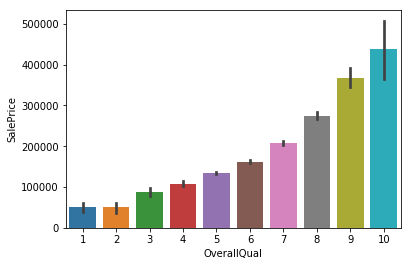

In [10]:
#List_to_select from: OverallQual, GrLivArea

sns.barplot(train.OverallQual,train.SalePrice)

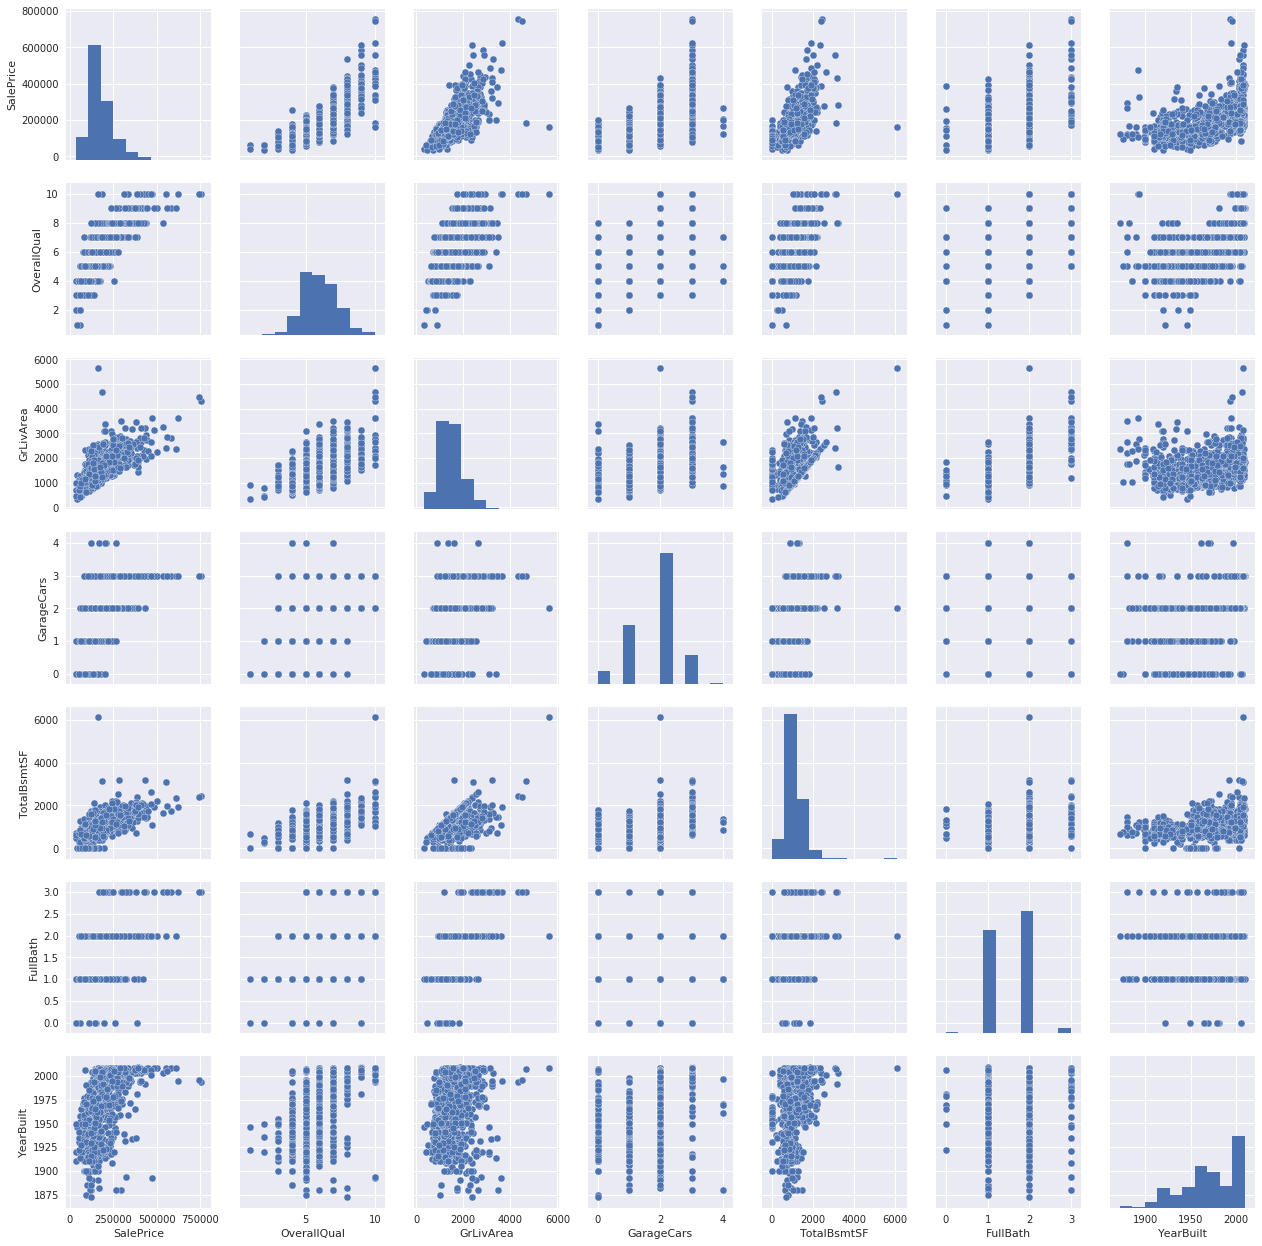

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();


 mu = 180921.20 and sigma = 79415.29



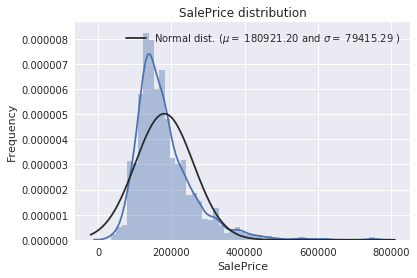

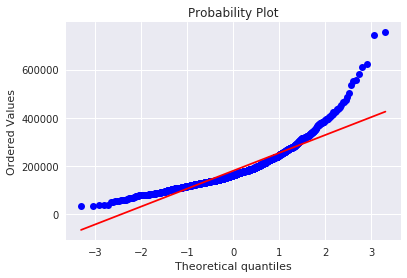

In [12]:


from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



In [13]:
train.SalePrice = np.log1p(train.SalePrice )


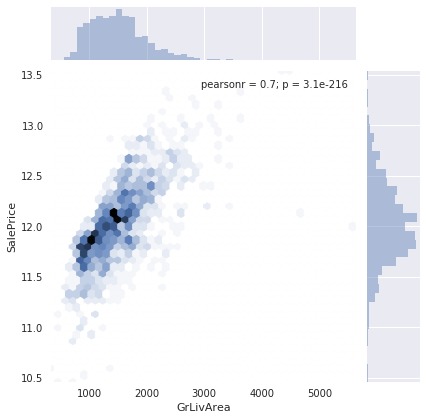

In [14]:

y =train.SalePrice
x = train.GrLivArea

sns.jointplot(x=x, y=y, kind='hex')
plt.show()


In [15]:
train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [16]:
test_nas = test.isnull().sum()
test_nas = test_nas[test_nas>0]
test_nas.sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [17]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   

In [18]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=['object']).columns
print('categorial features ', categorical_features)

numerical_features = train.select_dtypes(exclude = ["object"]).columns

print('important features ',ImportantFeatures)

categorial features  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
important features  ['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


In [19]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = train[numerical_features]
train_cat = train[categorical_features]



Numerical features : 36
Categorical features : 43


In [20]:
train_important = train.ix[:, ImportantFeatures]

#train_important = pd.to_numeric(train_important)
print(train_important.dtypes)
train_important.head(3)

YearBuilt       int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
dtype: object


,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,2003,856,856,1710,2,8,2,548
1,1976,1262,1262,1262,2,6,2,460
2,2001,920,920,1786,2,6,2,608


In [21]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
print("Remaining NAs for numerical features in train im: " + str(train_important.isnull().values.sum()))
train_important = train_important.fillna(train_important.median())
print("Remaining NAs for numerical features in train im: " + str(train_important.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0
Remaining NAs for numerical features in train im: 0
Remaining NAs for numerical features in train im: 0


In [22]:
#from scipy.stats import skew 
#skewness = train_num.apply(lambda x: skew(x))
#skewness.sort_values(ascending=False)

In [23]:
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(1460, 252)

In [24]:
train_cat.head(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Model


In [25]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

(1460, 288)

In [26]:
#split the data to train the model 

X_train_im,X_test_im,y_train_im,y_test_im = train_test_split(train_important,y,test_size = 0.3,random_state= 0)
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)



In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

In [28]:
X_train_im.shape,X_test_im.shape,y_train_im.shape,y_test_im.shape

((1022, 8), (438, 8), (1022,), (438,))

In [29]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold





scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr2 = LinearRegression()

lr.fit(X_train_im,y_train_im)
test_pre_im = lr.predict(X_test_im)
train_pre_im = lr.predict(X_train_im)
#print('rmse on train imp',rmse_CV_train(lr).mean())
#print('rmse on train imp',rmse_CV_test(lr).mean())

print('one done')

lr2.fit(X_train,y_train)
test_pre = lr2.predict(X_test)
train_pre = lr2.predict(X_train)
print('rmse on train',rmse_CV_train(lr2).mean())
print('rmse on train',rmse_CV_test(lr2).mean())



one done
rmse on train 1070.55910979
rmse on train 0.252113288196


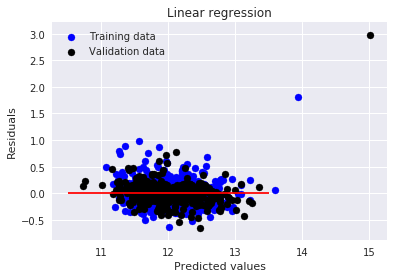

In [33]:
#plot between predicted values and residuals
plt.scatter(train_pre_im, train_pre_im - y_train_im, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre_im - y_test_im, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

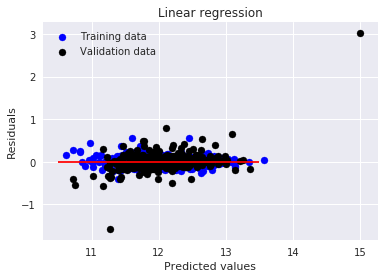

In [31]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

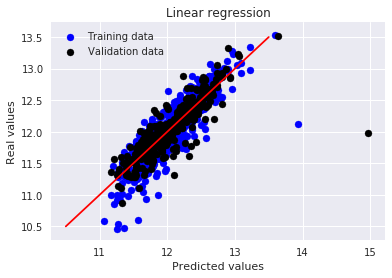

In [34]:
# Plot predictions - Real values
plt.scatter(train_pre_im, y_train_im, c = "blue",  label = "Training data")
plt.scatter(test_pre_im, y_test_im, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


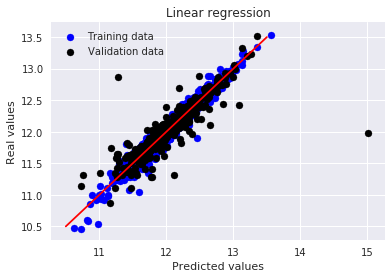

In [32]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()
